### Viewing and Structuring the Data

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
import numpy as np

import cv2

In [2]:
img_md_subset = pd.read_csv('../data/ecotaxa_export_3857_20201203_2323.tsv', sep='\t')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (265) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(img_md_subset)

25401

In [4]:
! pwd

/host/Code/deep_ifcb/python


In [5]:
cols_for_training = [
#'object_equiv_diameter',
'object_peak_fluorescence',
#'object_area',
#'object_area_over_perimeter',
#'object_biovolume',
#'object_bounding_box_xwidth',
#'object_bounding_box_ywidth',
#'object_major_axis_length',
#'object_minor_axis_length',
#'object_num_blobs',
#'object_peak_fluorescence',
'object_peak_scattering',
#'object_perimeter',
#'object_pmt_fluorescence',
#'object_pmt_scattering',
#'object_texture_average_contrast',
#'object_texture_average_gray_level',
#'object_texture_smoothness',
#'object_texture_uniformity',
]

In [6]:
cols_not_for_training = ['img_file_name',
'object_id',
'object_link',
'object_lat',
'object_lon',
'object_date',
'object_time',
'object_depth_min',
'object_depth_max',
'object_annotation_category',
'object_annotation_date',
'object_annotation_hierarchy',
'object_annotation_hierarchy.1',
'object_annotation_person_email',
'object_annotation_person_name',
'object_annotation_status',
'object_annotation_time',
'object_score',
'acq_id',
'acq_instrument',
'acq_resolution_pixels_per_micron',
'process_id',
'process_soft',
'process_soft_version',
'process_script',
'process_script_version',
'process_library',
'process_library_version',
'process_date',
'process_time',
'sample_id',
'sample_source',
'sample_flag',
'sample_cruise',
'sample_vessel',
'sample_reference',
'sample_station',
'sample_cast',
'sample_source_id', 
'sample_culture_species',
'sample_concentration',
'sample_dataportal_descriptor',                        
'object_roi_number',
'Unnamed: 0',
'index',
'merged_category',
'level_0',
'sample_experiment_state',
'sample_experiment_dilution', 
'sample_experiment_light_level',
'sample_experiment_nutrients',
'object_area_over_perimeter_squared',            
'object_area_over_perimeter',                       
'object_h90_over_hflip',                           
'object_h90_over_h180',                              
'object_hflip_over_h180',                         
'object_summed_convex_perimeter_over_perimeter',   
'object_rotated_bounding_box_solidity']

### somewhat merged categories

In [7]:
# Diatoms: 

## Pennate Diatoms:
amphiprora = ['Amphiprora']                    
banquisia_belgicae = ['Banquisia belgicae']
cylindrotheca = ['Cylindrotheca']                 
licmophora = ['Licmophora']
nitzschia_frigida = ['Nitzschia frigida']             
pseudo_nitzschia_chain = ['Pseudo-Nitzschia chain'] 

unidentified_single_pennate = [
    'Membraneis',
    'Navicula',
    'temp cylindrotheca',
    'pennate 1 temp',
    'pennate 2 temp',
    'pennate 7 temp',
    'pennate 10 temp',
    'pennate 11 temp',
    'chain<pennate',
    'pennate<Bacillariophyta'
]

## Centric Diatoms
chaetoceros_mediophyceae = ['Chaetoceros<Mediophyceae']
chaetoceros_single = ['Chaetoceros single']
corethron = ['Corethron']
eucampia_chain = ['Eucampia chain']
eucampia = ['Eucampia']
dactyliosolen = ['Dactyliosolen']
odontella = ['Odontella sp.']
proboscia = ['Proboscia sp.']
rhizosolenia = ['Rhizosolenia']
unidentified_single_centric = [
    'centric 1 temp',
    'centric 2 temp',
    'centric 3 temp',
    'centric 4 temp',
    'centric 6 temp',
    'centric',
    'chain<centric'
]

# Cryptophytes: 
cryptophyta = ['Cryptophyta']

# Dinoflagellates: 
gyrodinium = ['Gyrodinium']
gymnodinium = ['Gymnodinium'] 
katodinium = ['Katodinium']
warnowia = ['Warnowia']
dinoflagellate_i = ['dinoflagellate-i']
dinoflagellate_ii = ['dinoflagellate-ii']
dinoflagellate_iii = ['dinoflagellate-iii']

dinophyceae = ['Dinophyceae']

# Prasinophytes/Chlorophytes:
pyramimonas = ['Pyramimonas']

# Haptophytes/Prymnesiophyte:
phaeocystis = ['Phaeocystis']

# Silicoflagellates:
dictyochales = ['Dictyochales']

# Microzooplankton: 
ciliophora = ['Ciliophora']
tintinnida = ['Tintinnida']

unidentified_flagellates = [ 
    't002',
    't005',
    't007',
    't009',
    't012',
    't013',
    't020'
]

unidentified_living_cells = [ 
    't006',
    't019'
]

other = [ 
    'bead',
    'bubble',
    'detritus',
    'badfocus<artefact',
    'multiple<other'
]

In [8]:
all_classes = list(img_md_subset.groupby('object_annotation_category')['object_id'].nunique().index)

In [9]:
all_classes_sep = amphiprora+banquisia_belgicae+cylindrotheca+licmophora+nitzschia_frigida+pseudo_nitzschia_chain+unidentified_single_pennate+chaetoceros_mediophyceae+chaetoceros_single+corethron+eucampia_chain+eucampia+dactyliosolen+odontella +proboscia+rhizosolenia +unidentified_single_centric+cryptophyta+gyrodinium+gymnodinium+katodinium+warnowia+dinoflagellate_i+dinoflagellate_ii +dinoflagellate_iii+dinophyceae+pyramimonas +phaeocystis+dictyochales +ciliophora +tintinnida+unidentified_flagellates+unidentified_living_cells+other
len(all_classes), len(all_classes_sep)

(60, 60)

In [10]:
list(set(all_classes) - set(all_classes_sep))

[]

In [11]:
list(set(all_classes_sep) - set(all_classes))

[]

In [12]:
class_str = 'amphiprora+banquisia_belgicae+cylindrotheca+licmophora+nitzschia_frigida+pseudo_nitzschia_chain+unidentified_single_pennate+chaetoceros_mediophyceae+chaetoceros_single+corethron+eucampia_chain+eucampia+dactyliosolen+odontella +proboscia+rhizosolenia +unidentified_single_centric+cryptophyta+gyrodinium+gymnodinium+katodinium+warnowia+dinoflagellate_i+dinoflagellate_ii +dinoflagellate_iii+dinophyceae+pyramimonas +phaeocystis+dictyochales +ciliophora +tintinnida+unidentified_flagellates+unidentified_living_cells+other'
class_str.replace('+', ',')

'amphiprora,banquisia_belgicae,cylindrotheca,licmophora,nitzschia_frigida,pseudo_nitzschia_chain,unidentified_single_pennate,chaetoceros_mediophyceae,chaetoceros_single,corethron,eucampia_chain,eucampia,dactyliosolen,odontella ,proboscia,rhizosolenia ,unidentified_single_centric,cryptophyta,gyrodinium,gymnodinium,katodinium,warnowia,dinoflagellate_i,dinoflagellate_ii ,dinoflagellate_iii,dinophyceae,pyramimonas ,phaeocystis,dictyochales ,ciliophora ,tintinnida,unidentified_flagellates,unidentified_living_cells,other'

In [13]:
class_str.replace('+', "','")

"amphiprora','banquisia_belgicae','cylindrotheca','licmophora','nitzschia_frigida','pseudo_nitzschia_chain','unidentified_single_pennate','chaetoceros_mediophyceae','chaetoceros_single','corethron','eucampia_chain','eucampia','dactyliosolen','odontella ','proboscia','rhizosolenia ','unidentified_single_centric','cryptophyta','gyrodinium','gymnodinium','katodinium','warnowia','dinoflagellate_i','dinoflagellate_ii ','dinoflagellate_iii','dinophyceae','pyramimonas ','phaeocystis','dictyochales ','ciliophora ','tintinnida','unidentified_flagellates','unidentified_living_cells','other"

### adding all the merged classes into the dataframe

In [14]:
classes = [amphiprora,banquisia_belgicae,cylindrotheca,licmophora,nitzschia_frigida,pseudo_nitzschia_chain,unidentified_single_pennate,chaetoceros_mediophyceae,chaetoceros_single,corethron,eucampia_chain,eucampia,dactyliosolen,odontella ,proboscia,rhizosolenia ,unidentified_single_centric,cryptophyta,gyrodinium,gymnodinium,katodinium,warnowia,dinoflagellate_i,dinoflagellate_ii ,dinoflagellate_iii,dinophyceae,pyramimonas ,phaeocystis,dictyochales ,ciliophora ,tintinnida,unidentified_flagellates,unidentified_living_cells,other]


In [15]:
classes = [amphiprora,banquisia_belgicae,cylindrotheca,licmophora,nitzschia_frigida,pseudo_nitzschia_chain,unidentified_single_pennate,chaetoceros_mediophyceae,chaetoceros_single,corethron,eucampia_chain,eucampia,dactyliosolen,odontella ,proboscia,rhizosolenia ,unidentified_single_centric,cryptophyta,gyrodinium,gymnodinium,katodinium,warnowia,dinoflagellate_i,dinoflagellate_ii ,dinoflagellate_iii,dinophyceae,pyramimonas ,phaeocystis,dictyochales ,ciliophora ,tintinnida,unidentified_flagellates,unidentified_living_cells,other]

class_names = ['amphiprora','banquisia_belgicae','cylindrotheca','licmophora','nitzschia_frigida','pseudo_nitzschia_chain','unidentified_single_pennate','chaetoceros_mediophyceae','chaetoceros_single','corethron','eucampia_chain','eucampia','dactyliosolen','odontella ','proboscia','rhizosolenia ','unidentified_single_centric','cryptophyta','gyrodinium','gymnodinium','katodinium','warnowia','dinoflagellate_i','dinoflagellate_ii ','dinoflagellate_iii','dinophyceae','pyramimonas ','phaeocystis','dictyochales ','ciliophora ','tintinnida','unidentified_flagellates','unidentified_living_cells','other']

img_md_subset["merged_category"] = ""
for i in range(len(classes)):
    img_md_subset['merged_category'][img_md_subset['object_annotation_category'].isin(classes[i])] = class_names[i]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### super merged categories

In [16]:
# Diatoms: 

## Pennate Diatoms:
pennates = [
    'Amphiprora',                    
    'Banquisia belgicae',
    'Cylindrotheca'  ,             
    'Licmophora',
    'Nitzschia frigida'  ,        
    'Pseudo-Nitzschia chain',
    'Membraneis',
    'Navicula',
    'temp cylindrotheca',
    'pennate 1 temp',
    'pennate 2 temp',
    'pennate 7 temp',
    'pennate 10 temp',
    'pennate 11 temp',
    'chain<pennate',
    'pennate<Bacillariophyta'
]

## Centric Diatoms
centrics = [
    'Chaetoceros<Mediophyceae',
    'Chaetoceros single',
    'Corethron',
    'Eucampia chain',
    'Eucampia',
    'Dactyliosolen',
    'Odontella sp.',
    'Proboscia sp.',
    'Rhizosolenia',
    'centric 1 temp',
    'centric 2 temp',
    'centric 3 temp',
    'centric 4 temp',
    'centric 6 temp',
    'centric',
    'chain<centric'
]

# Cryptophytes: 
cryptophyta = ['Cryptophyta']

dinoflagellates = [
    'Gyrodinium',
    'Gymnodinium',
    'Katodinium',
    'Warnowia',
    'dinoflagellate-i',
    'dinoflagellate-ii',
    'dinoflagellate-iii',
    'Dinophyceae'
]

# Prasinophytes/Chlorophytes:
pyramimonas = ['Pyramimonas']

# Haptophytes/Prymnesiophyte:
phaeocystis = ['Phaeocystis']

# Silicoflagellates:
dictyochales = ['Dictyochales']

# Microzooplankton: 
ciliophora = ['Ciliophora']
tintinnida = ['Tintinnida']

unidentified_flagellates = [ 
    't002',
    't005',
    't007',
    't009',
    't012',
    't013',
    't020'
]

unidentified_living_cells = [ 
    't006',
    't019'
]

other = [ 
    'bead',
    'bubble',
    'detritus',
    'badfocus<artefact',
    'multiple<other'
]

In [17]:
all_classes = list(img_md_subset.groupby('object_annotation_category')['object_id'].nunique().index)

In [18]:
all_classes_sep = pennates+centrics+cryptophyta+dinoflagellates+pyramimonas+phaeocystis+dictyochales+ciliophora+tintinnida+unidentified_flagellates+unidentified_living_cells+other
len(all_classes), len(all_classes_sep)

(60, 60)

In [19]:
list(set(all_classes) - set(all_classes_sep))

[]

In [20]:
list(set(all_classes_sep) - set(all_classes))

[]

In [21]:
class_str = 'pennates+centrics+cryptophyta+dinoflagellates+pyramimonas+phaeocystis+dictyochales+ciliophora+tintinnida+unidentified_flagellates+unidentified_living_cells+other'
class_str.replace('+', ',')

'pennates,centrics,cryptophyta,dinoflagellates,pyramimonas,phaeocystis,dictyochales,ciliophora,tintinnida,unidentified_flagellates,unidentified_living_cells,other'

In [22]:
class_str.replace('+', "','")

"pennates','centrics','cryptophyta','dinoflagellates','pyramimonas','phaeocystis','dictyochales','ciliophora','tintinnida','unidentified_flagellates','unidentified_living_cells','other"

### adding all the merged classes into the dataframe

In [23]:
classes = [pennates,centrics,cryptophyta,dinoflagellates,pyramimonas,phaeocystis,dictyochales,ciliophora,tintinnida,unidentified_flagellates,unidentified_living_cells,other]

class_names = ['pennates','centrics','cryptophyta','dinoflagellates','pyramimonas','phaeocystis','dictyochales','ciliophora','tintinnida','unidentified_flagellates','unidentified_living_cells','other']

img_md_subset["merged_category"] = ""
for i in range(len(classes)):
    img_md_subset['merged_category'][img_md_subset['object_annotation_category'].isin(classes[i])] = class_names[i]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### For now only using validated images

In [16]:
#img_md_subset = img_md_subset[img_md_subset.object_annotation_status == 'validated']

rare_count = 400

unique_validated = img_md_subset[img_md_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

rare_classes = unique_validated[unique_validated <= rare_count]

#val_img_subset = val_img_subset[val_img_subset['object_annotation_category'].isin(list(rare_classes.index))]
rare_classes

object_annotation_category
Banquisia belgicae          64
Chaetoceros single         295
Corethron                  116
Dictyochales               167
Dinophyceae                165
Eucampia                   141
Eucampia chain              97
Gymnodinium                263
Gyrodinium                 166
Licmophora                 148
Membraneis                 256
Navicula                   353
Odontella sp.               80
Proboscia sp.              243
Rhizosolenia               140
Tintinnida                  50
Warnowia                    53
bubble                     352
centric                    142
centric 4 temp             364
centric 6 temp             262
dinoflagellate-i           353
dinoflagellate-iii         270
pennate<Bacillariophyta     57
t006                        68
t007                       234
t009                       147
t012                       376
t013                       340
t019                       301
t020                       211
temp cylindr

#### drop all unwanted classes

In [17]:
# drop unwanted classes

# Here are groups we can cut:
classes_to_drop = ['Banquisia belgicae',
'Dinophyceae',
'pennate<Bacillariophyta',
'Licmophora',
'Rhizosolenia',
'centric 4 temp',
'centric 6 temp',
't005',
't006',
't009',
't019',
't020',
'Warnowia',
'multiple<other']
print(len(img_md_subset))
img_md_subset = img_md_subset.drop(img_md_subset[img_md_subset.object_annotation_category.isin(classes_to_drop)].index)
print(len(img_md_subset))

25401
22380


In [18]:
# Here are groups we can combine:

img_md_subset[img_md_subset.object_annotation_category == 'Tintinnida'] = 'Ciliophora'
img_md_subset[img_md_subset.object_annotation_category == 'Odontella sp.'] = 'chain<centric'
img_md_subset[img_md_subset.object_annotation_category == 'Eucampia chain'] = 'chain<centric'
len(img_md_subset)

22380

#### Filter this data to only use validated and other filters TODO

In [19]:
val_subset = img_md_subset[img_md_subset.object_annotation_status == 'validated']
len(val_subset)

22153

#### Getting Images Organized

In [20]:
import glob, os

fn_list = []
for file in glob.glob("../../../Data/all_imagery/*.png"):
    fn_list.append(file)
    
print(len(fn_list))

fn_edit = [x[26:-4] for x in fn_list]

5806675


Only use data where we have both labels and imagery

In [21]:
val_img_subset = val_subset[val_subset['object_id'].isin(fn_edit)]
len(val_img_subset)

22032

### filter out images based on size

In [22]:
import imagesize

small_object_ids = []


for index, row in val_img_subset.iterrows():
    width, height = imagesize.get('../../../Data/all_imagery/'+row['object_id']+'.png')
    #width, height = imagesize.get("test.png")
    if width < 25 or height < 25:
        #small_object_ids.append(row['object_id'])
        pass
    if row['object_bounding_box_xwidth'] < 25 or row['object_bounding_box_ywidth'] < 15:
        pass
    if row['object_major_axis_length'] < 25:
        small_object_ids.append(row['object_id'])
len(small_object_ids)

2332

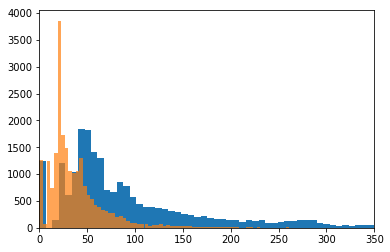

In [25]:
plt.hist(val_img_subset['object_major_axis_length'].values.astype(np.float16), bins=250)
plt.hist(val_img_subset['object_minor_axis_length'].values.astype(np.float16),alpha=0.7, bins=150)
plt.xlim(0,350)
plt.show()

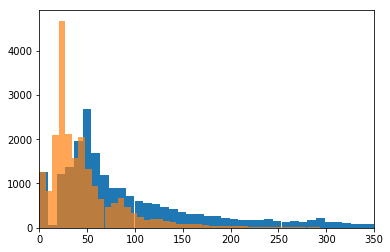

In [26]:
plt.hist(val_img_subset['object_bounding_box_xwidth'].values.astype(np.float16), bins=150)
plt.hist(val_img_subset['object_bounding_box_ywidth'].values.astype(np.float16),alpha=0.7, bins=150)
plt.xlim(0,350)
plt.show()

(0, 350)

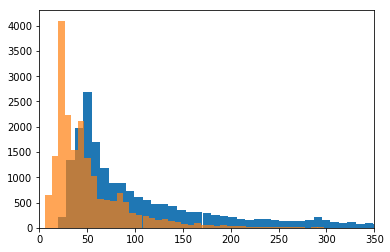

In [27]:
plt.hist(val_img_subset[~val_img_subset['object_id'].isin(small_object_ids)]['object_bounding_box_xwidth'].values.astype(np.float16), bins=150)
plt.hist(val_img_subset[~val_img_subset['object_id'].isin(small_object_ids)]['object_bounding_box_ywidth'].values.astype(np.float16), alpha=0.7, bins=150)
plt.xlim(0,350)

In [28]:
small_df = val_img_subset[val_img_subset['object_id'].isin(small_object_ids)]

In [29]:
with pd.option_context('display.max_rows', 200):
    print(small_df.groupby('object_annotation_category')['object_id'].nunique())

object_annotation_category
Amphiprora              1
Dactyliosolen           7
Phaeocystis            10
Pyramimonas            10
badfocus<artefact    1194
bead                  520
bubble                  6
centric 3 temp          4
detritus                1
pennate 1 temp          4
pennate 2 temp          1
t002                  556
t012                   18
Name: object_id, dtype: int64


t002


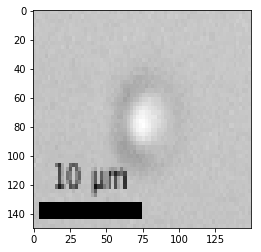

t002


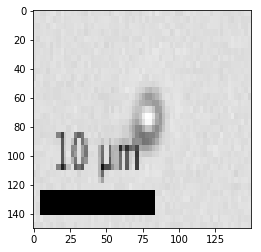

badfocus<artefact


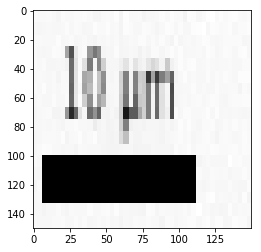

badfocus<artefact


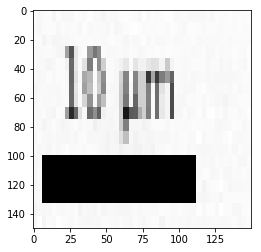

t002


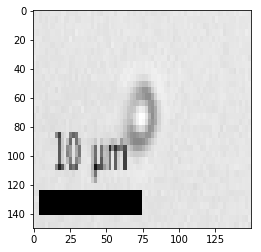

badfocus<artefact


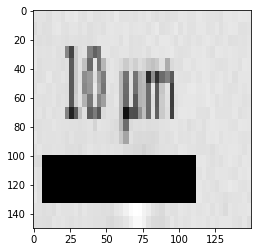

t002


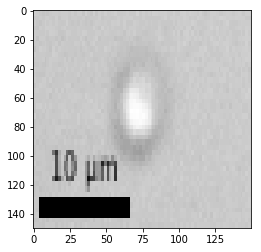

badfocus<artefact


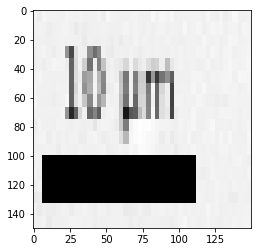

bead


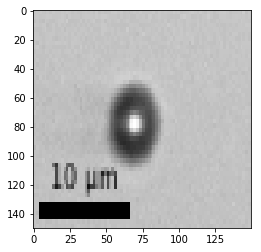

t002


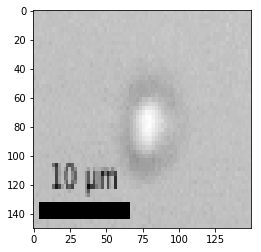

badfocus<artefact


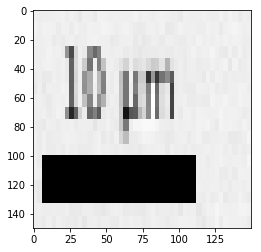

badfocus<artefact


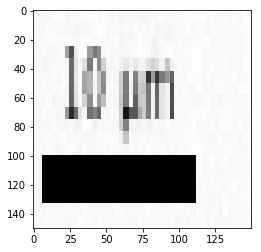

badfocus<artefact


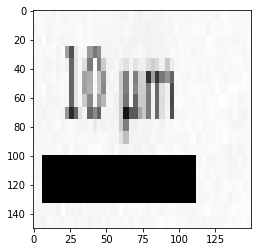

badfocus<artefact


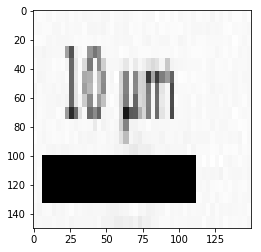

badfocus<artefact


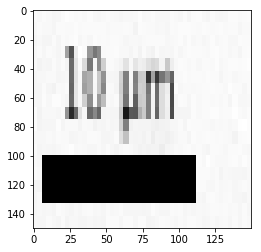

badfocus<artefact


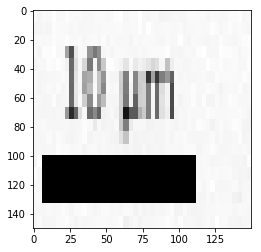

badfocus<artefact


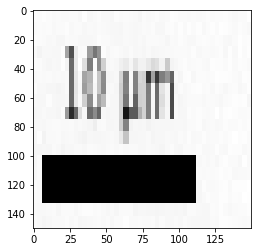

bead


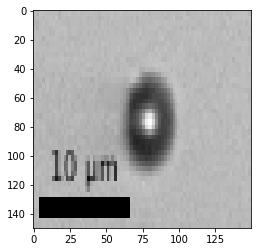

bead


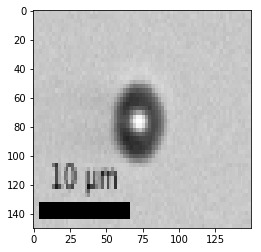

bead


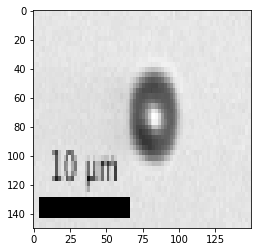

badfocus<artefact


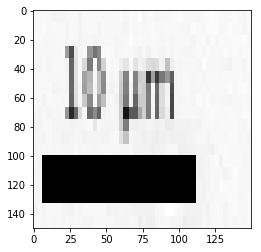

badfocus<artefact


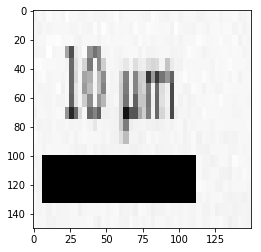

badfocus<artefact


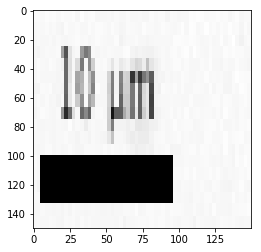

bead


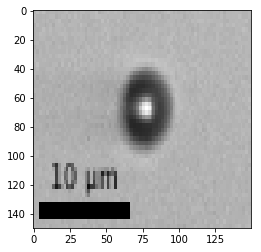

bead


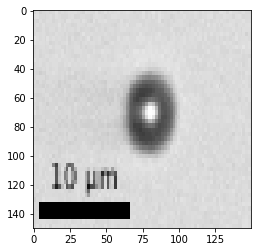

badfocus<artefact


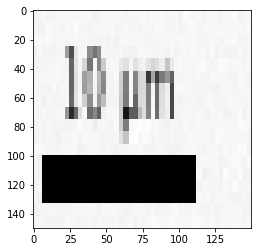

badfocus<artefact


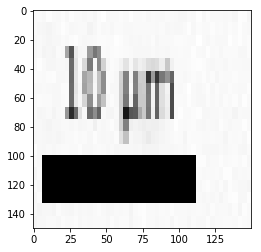

t002


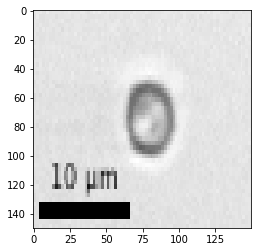

bead


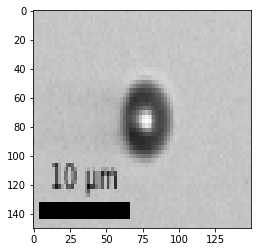

badfocus<artefact


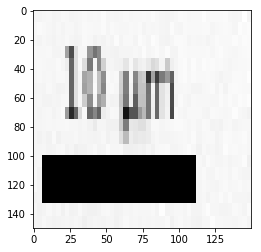

t002


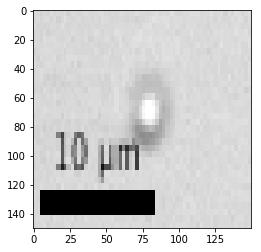

t002


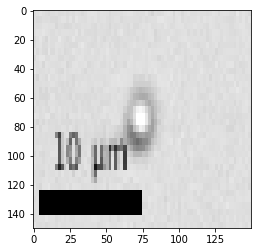

badfocus<artefact


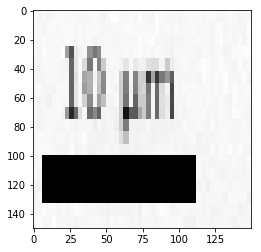

badfocus<artefact


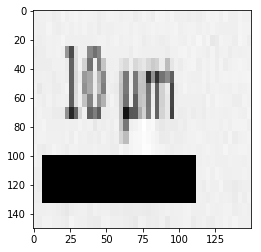

badfocus<artefact


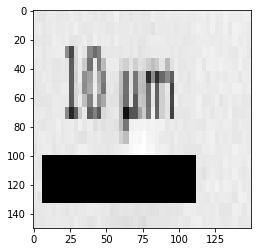

bead


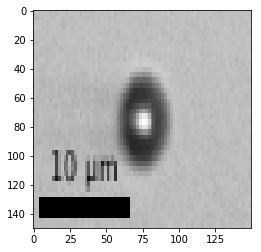

bead


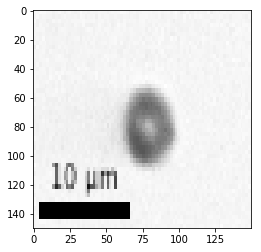

Phaeocystis


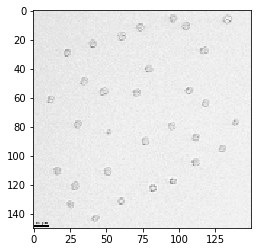

bead


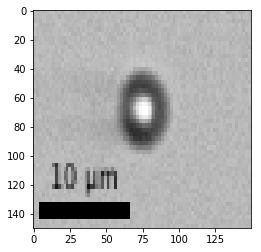

t002


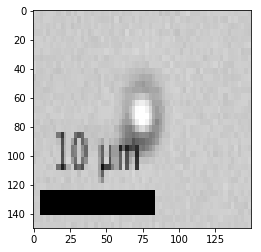

In [30]:
import cv2
from tensorflow.keras.preprocessing import image


for index, row in small_df.sample(n=40).iterrows():
    print(row['object_annotation_category'])
    #im = cv2.imread('../../../Data/all_imagery/'+row['object_id']+'.png', cv2.IMREAD_GRAYSCALE)
    im = image.load_img('../../../Data/all_imagery/'+row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
    plt.imshow(image.img_to_array(im)[:,:,0], cmap="Greys_r")
    plt.show()

In [31]:
val_img_subset = val_img_subset[~val_img_subset['object_id'].isin(small_object_ids)]

Only use classes with `min_count` or more samples

In [35]:
min_count = 50


unique_validated = val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

sufficient_classes = unique_validated[unique_validated >= min_count]

val_img_subset = val_img_subset[val_img_subset['object_annotation_category'].isin(list(sufficient_classes.index))]

In [36]:
val_img_subset.head()

object_id object_lat object_lon object_date  \
0  D20170905T132200_IFCB107_00007     43.736    -43.009    20170905   
1  D20170904T161256_IFCB107_00002     42.387    -42.947    20170904   
2  D20170904T172259_IFCB107_00004     42.384    -42.931    20170904   
3  D20170904T183300_IFCB107_00002     42.378    -42.916    20170904   
4  D20170905T015820_IFCB107_00003     42.371     -42.89    20170905   

  object_time object_link object_depth_min object_depth_max  \
0      132200         NaN                5                5   
1      161256         NaN                5                5   
2      172259         NaN                5                5   
3      183300         NaN                5                5   
4       15820         NaN                5                5   

  object_annotation_status object_annotation_person_name       ...        \
0                validated                           NaN       ...         
1                validated                           NaN       ...         
2                validated                           NaN       ...         
3                validated                           NaN       ...         
4                validated                           NaN       ...         

  process_script                    process_script_version process_library  \
0       easyIFCB  870c8428659f37e17e280fd213b07c0b1a692b86   ifcb-analysis   
1       easyIFCB  870c8428659f37e17e280fd213b07c0b1a692b86   ifcb-analysis   
2       easyIFCB  870c8428659f37e17e280fd213b07c0b1a692b86   ifcb-analysis   
3       easyIFCB  870c8428659f37e17e280fd213b07c0b1a692b86   ifcb-analysis   
4       easyIFCB  870c8428659f37e17e280fd213b07c0b1a692b86   ifcb-analysis   

                          process_library_version process_date process_time  \
0  e9e37998a8bb8caf587b19418202b650ba0b99f2-durty     20170927       220000   
1  e9e37998a8bb8caf587b19418202b650ba0b99f2-durty     20170927       220000   
2  e9e37998a8bb8caf587b19418202b650ba0b99f2-durty     20170927       220000   
3  e9e37998a8bb8caf587b19418202b650ba0b99f2-durty     20170927       220000   
4  e9e37998a8bb8caf587b19418202b650ba0b99f2-durty     20170927       220000   

    acq_id acq_instrument acq_resolution_pixels_per_micron merged_category  
0  IFCB107           IFCB                              3.4     ciliophora   
1  IFCB107           IFCB                              3.4     ciliophora   
2  IFCB107           IFCB                              3.4     ciliophora   
3  IFCB107           IFCB                              3.4     ciliophora   
4  IFCB107           IFCB                              3.4     ciliophora   

[5 rows x 287 columns]

In [ ]:
# bead and t002 are cut out by this 50 class min

In [37]:
with pd.option_context('display.max_rows', 200):
    print(val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique())
    print(len(val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')))

object_annotation_category
Amphiprora                   490
Chaetoceros single           295
Chaetoceros<Mediophyceae     739
Ciliophora                   405
Corethron                    116
Cryptophyta                 1193
Cylindrotheca                443
Dactyliosolen                429
Dictyochales                 167
Eucampia                     141
Gymnodinium                  263
Gyrodinium                   166
Katodinium                   454
Membraneis                   256
Navicula                     353
Nitzschia frigida            834
Phaeocystis                 1010
Proboscia sp.                243
Pseudo-Nitzschia chain      1045
Pyramimonas                  887
bubble                       346
centric                      142
centric 1 temp               595
centric 2 temp               859
centric 3 temp               444
chain<centric                562
chain<pennate                531
detritus                     896
dinoflagellate-i             353
dinoflagellate-i

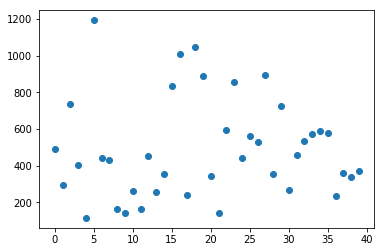

In [38]:
plt.scatter(range(0,len(val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique().values)),val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique().values)

In [39]:
class_id_list = [[x, i] for i, x in enumerate(list(sufficient_classes.index))]
class_id_dict = {key: value for (key, value) in class_id_list}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

class_id_dict

{'Amphiprora': 0,
 'Chaetoceros single': 1,
 'Chaetoceros<Mediophyceae': 2,
 'Ciliophora': 3,
 'Corethron': 4,
 'Cryptophyta': 5,
 'Cylindrotheca': 6,
 'Dactyliosolen': 7,
 'Dictyochales': 8,
 'Eucampia': 9,
 'Gymnodinium': 10,
 'Gyrodinium': 11,
 'Katodinium': 12,
 'Membraneis': 13,
 'Navicula': 14,
 'Nitzschia frigida': 15,
 'Phaeocystis': 16,
 'Proboscia sp.': 17,
 'Pseudo-Nitzschia chain': 18,
 'Pyramimonas': 19,
 'bubble': 20,
 'centric': 21,
 'centric 1 temp': 22,
 'centric 2 temp': 23,
 'centric 3 temp': 24,
 'chain<centric': 25,
 'chain<pennate': 26,
 'detritus': 27,
 'dinoflagellate-i': 28,
 'dinoflagellate-ii': 29,
 'dinoflagellate-iii': 30,
 'pennate 1 temp': 31,
 'pennate 10 temp': 32,
 'pennate 11 temp': 33,
 'pennate 2 temp': 34,
 'pennate 7 temp': 35,
 't007': 36,
 't012': 37,
 't013': 38,
 'temp cylindrotheca': 39}

In [40]:
buckets = {}
for key in id_class_dict:
    buckets[key] = 0

object_ids = []

max_count = 1000

# TODO need to somehow prioritize the undersampled classes first or they might only consist of the highly available ones
# this might be easier if merge them after this step...
for index, row in val_img_subset.iterrows():
    if buckets[class_id_dict[row['object_annotation_category']]] < max_count:
        object_ids.append(row['object_id'])
        buckets[class_id_dict[row['object_annotation_category']]] += 1
len(object_ids)

19436

In [41]:
balanced_df = val_img_subset
#balanced_df = val_img_subset[val_img_subset['object_id'].isin(object_ids)]
balanced_df.head()

object_id object_lat object_lon object_date  \
0  D20170905T132200_IFCB107_00007     43.736    -43.009    20170905   
1  D20170904T161256_IFCB107_00002     42.387    -42.947    20170904   
2  D20170904T172259_IFCB107_00004     42.384    -42.931    20170904   
3  D20170904T183300_IFCB107_00002     42.378    -42.916    20170904   
4  D20170905T015820_IFCB107_00003     42.371     -42.89    20170905   

  object_time object_link object_depth_min object_depth_max  \
0      132200         NaN                5                5   
1      161256         NaN                5                5   
2      172259         NaN                5                5   
3      183300         NaN                5                5   
4       15820         NaN                5                5   

  object_annotation_status object_annotation_person_name       ...        \
0                validated                           NaN       ...         
1                validated                           NaN       ...         
2                validated                           NaN       ...         
3                validated                           NaN       ...         
4                validated                           NaN       ...         

  process_script                    process_script_version process_library  \
0       easyIFCB  870c8428659f37e17e280fd213b07c0b1a692b86   ifcb-analysis   
1       easyIFCB  870c8428659f37e17e280fd213b07c0b1a692b86   ifcb-analysis   
2       easyIFCB  870c8428659f37e17e280fd213b07c0b1a692b86   ifcb-analysis   
3       easyIFCB  870c8428659f37e17e280fd213b07c0b1a692b86   ifcb-analysis   
4       easyIFCB  870c8428659f37e17e280fd213b07c0b1a692b86   ifcb-analysis   

                          process_library_version process_date process_time  \
0  e9e37998a8bb8caf587b19418202b650ba0b99f2-durty     20170927       220000   
1  e9e37998a8bb8caf587b19418202b650ba0b99f2-durty     20170927       220000   
2  e9e37998a8bb8caf587b19418202b650ba0b99f2-durty     20170927       220000   
3  e9e37998a8bb8caf587b19418202b650ba0b99f2-durty     20170927       220000   
4  e9e37998a8bb8caf587b19418202b650ba0b99f2-durty     20170927       220000   

    acq_id acq_instrument acq_resolution_pixels_per_micron merged_category  
0  IFCB107           IFCB                              3.4     ciliophora   
1  IFCB107           IFCB                              3.4     ciliophora   
2  IFCB107           IFCB                              3.4     ciliophora   
3  IFCB107           IFCB                              3.4     ciliophora   
4  IFCB107           IFCB                              3.4     ciliophora   

[5 rows x 287 columns]

In [43]:
len(balanced_df)

19684

In [44]:
import sys
 
sys.getsizeof(fn_edit) / 1e9

0.050897424

In [45]:
sys.getsizeof(val_img_subset) / 1e9, sys.getsizeof(img_md_subset) / 1e9

(0.203573816, 0.236807338)

In [46]:
# del img_md_subset
# del val_img_subset

## Run the Model

### Preprocess for Keras

Load all data into memory, may not work at full size

In [47]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [48]:
from tensorflow.keras.preprocessing import image
import numpy as np

images = []
labels = []
merged_labels = []
original_labels = []
flu_data = []
object_ids_training = []


for index, row in balanced_df.sample(frac=1).iterrows():
    
    # TODO need to think about optimal size and that size actually corresponds to class

#     img = image.load_img('../../../Data/all_imagery/'+row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
#     images.append(image.img_to_array(img))
    
#     instead of interpolating increasing to max dimension and then padding
#     see https://stackoverflow.com/questions/47697622/cnn-image-resizing-vs-padding-keeping-aspect-ratio-or-not/49882055#49882055
#     based on https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/
    desired_size = 150
    im = cv2.imread('../../../Data/all_imagery/'+row['object_id']+'.png', cv2.IMREAD_GRAYSCALE)
    old_size = im.shape[:2] # old_size is in (height, width) format
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    # new_size should be in (width, height) format
    im = cv2.resize(im, (new_size[1], new_size[0]))
    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    new_im = cv2.copyMakeBorder(im, 0, delta_h, 0, delta_w, cv2.BORDER_CONSTANT,0)
    img = new_im[..., np.newaxis]
    
    images.append(img)
    
    labels.append(class_id_dict[row['object_annotation_category']])
    #merged_labels.append(row['merged_category'])
    original_labels.append(row['object_annotation_category'])
    #flu_data.append([row['object_pmt_fluorescence'], row['object_peak_fluorescence']]) 
    # changes this to add all handcrafted features to the data as a vector
    flu_data.append(np.array(row[~balanced_df.columns.isin(cols_not_for_training)].values, dtype=np.float32))
    #flu_data.append(np.array(row[~balanced_df.columns.isin(cols_not_for_training)].values, dtype=np.float32))
    object_ids_training.append(row['object_id'])
    
images = np.array(images)
labels = np.array(labels)
#merged_labels = np.array(merged_labels)
original_labels = np.array(original_labels)
flu_data = np.array(flu_data)
object_ids_training = np.array(object_ids_training)

In [49]:
len(class_id_dict)

40

(10, 150, 150)


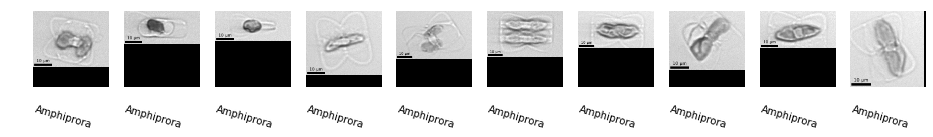

(10, 150, 150)


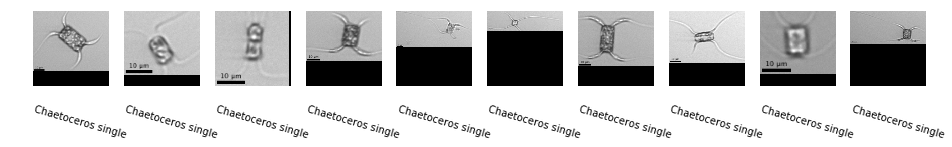

(10, 150, 150)


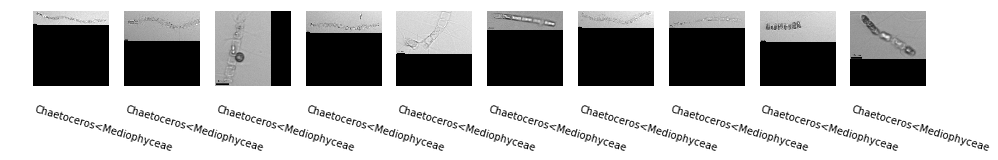

(10, 150, 150)


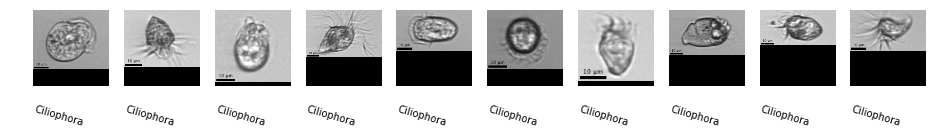

(10, 150, 150)


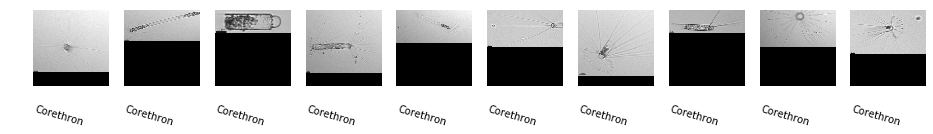

(10, 150, 150)


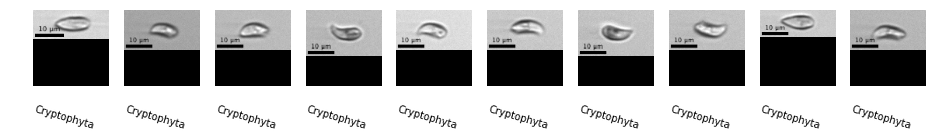

(10, 150, 150)


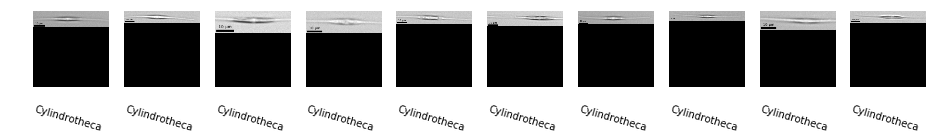

(10, 150, 150)


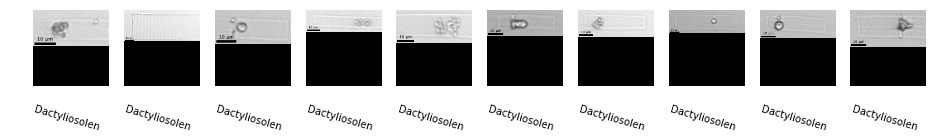

(10, 150, 150)


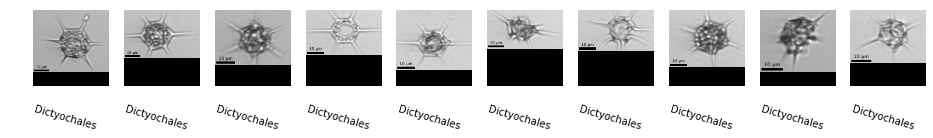

(10, 150, 150)


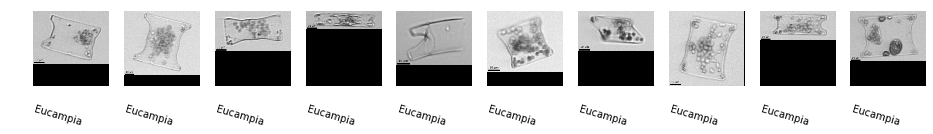

(10, 150, 150)


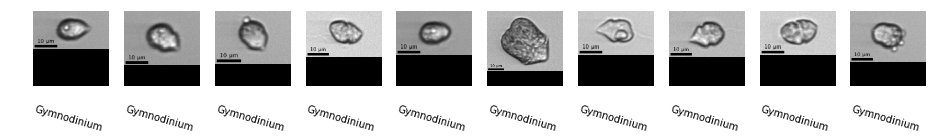

(10, 150, 150)


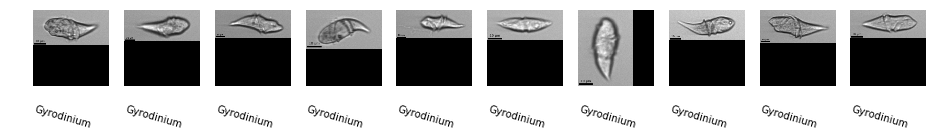

(10, 150, 150)


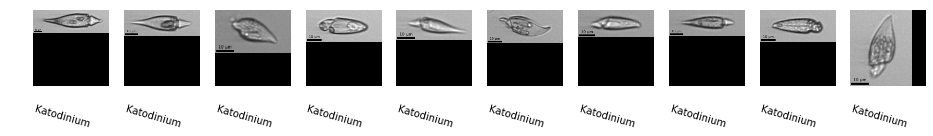

(10, 150, 150)


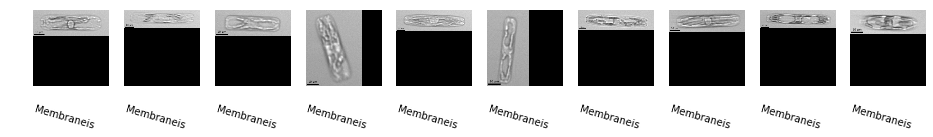

(10, 150, 150)


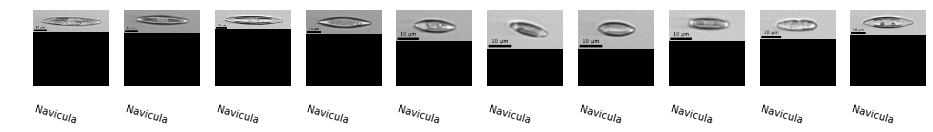

(10, 150, 150)


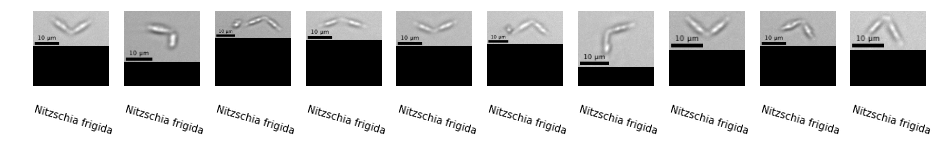

(10, 150, 150)


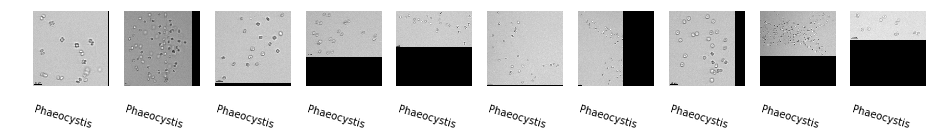

(10, 150, 150)


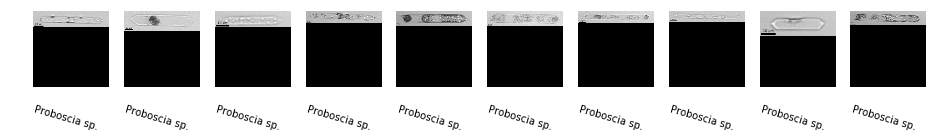

(10, 150, 150)


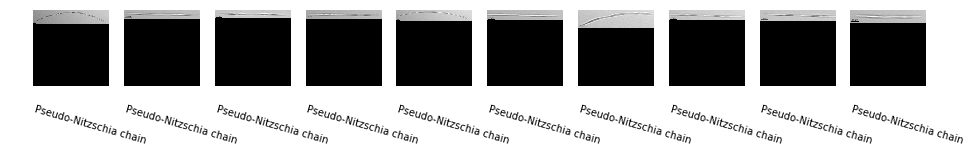

(10, 150, 150)


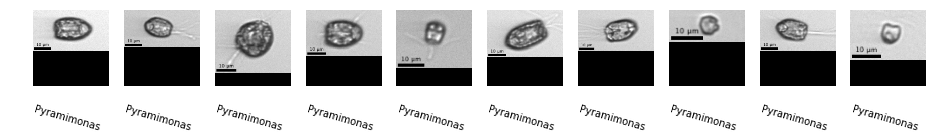

(10, 150, 150)


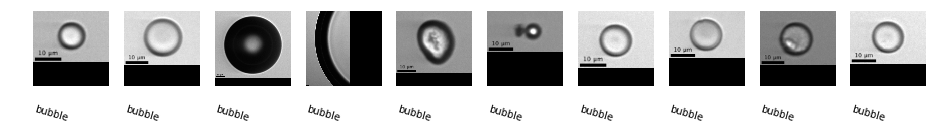

(10, 150, 150)


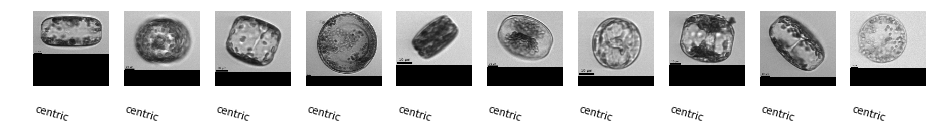

(10, 150, 150)


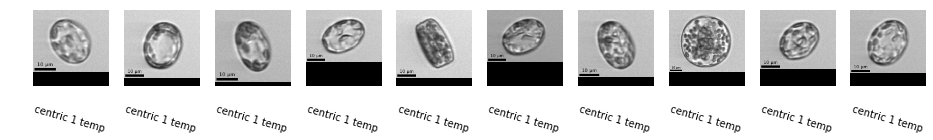

(10, 150, 150)


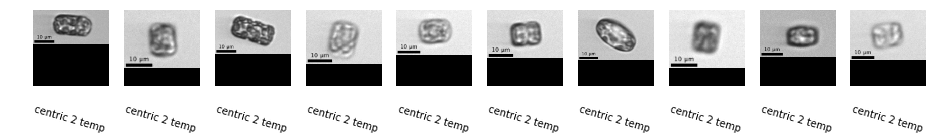

(10, 150, 150)


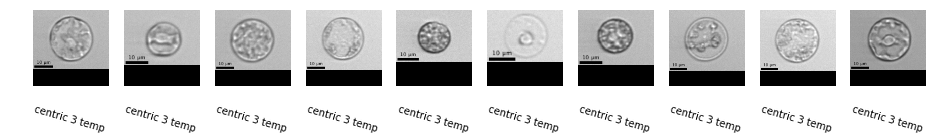

(10, 150, 150)


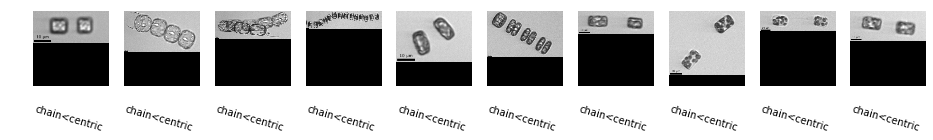

(10, 150, 150)


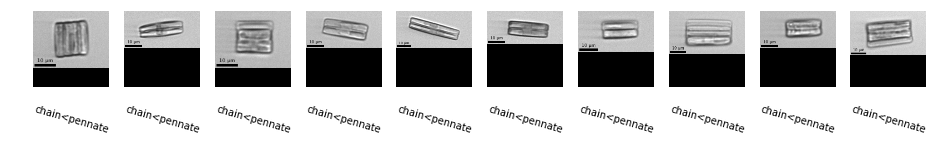

(10, 150, 150)


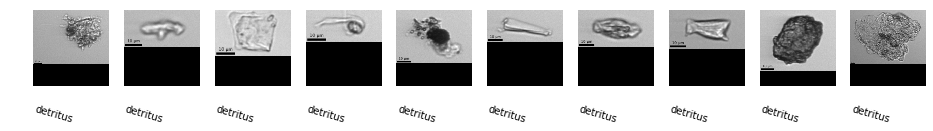

(10, 150, 150)


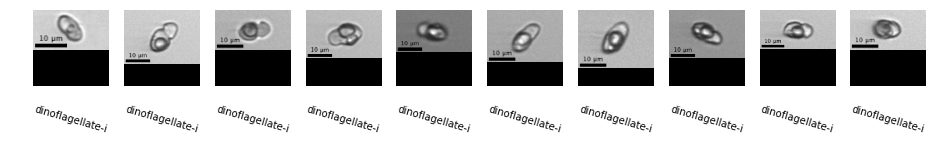

(10, 150, 150)


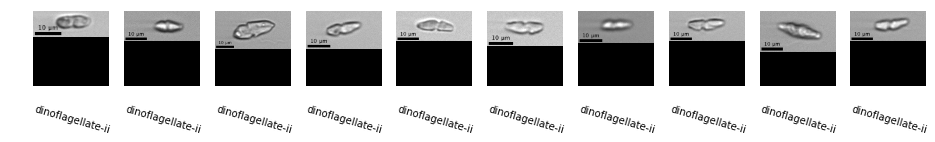

(10, 150, 150)


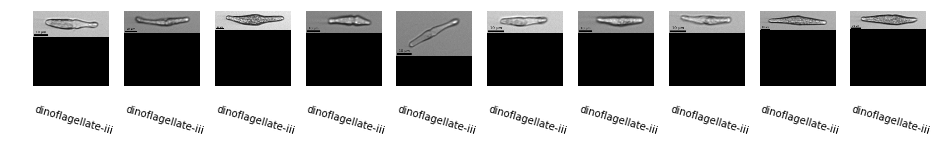

(10, 150, 150)


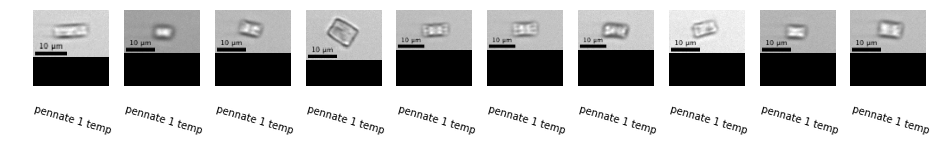

(10, 150, 150)


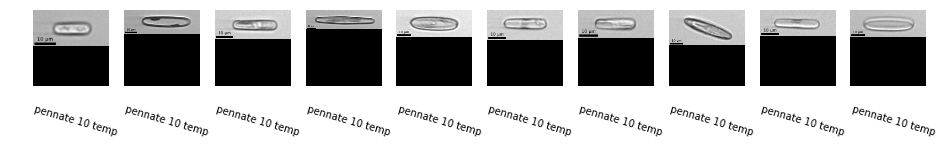

(10, 150, 150)


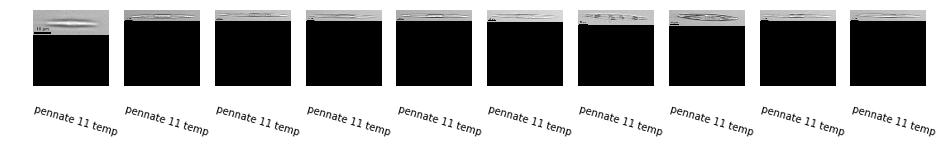

(10, 150, 150)


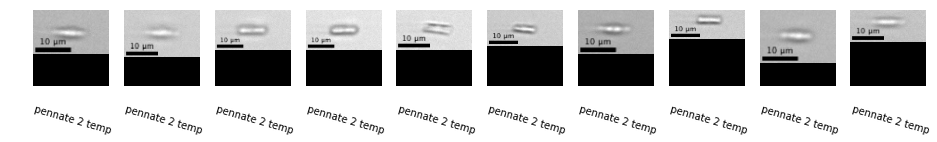

(10, 150, 150)


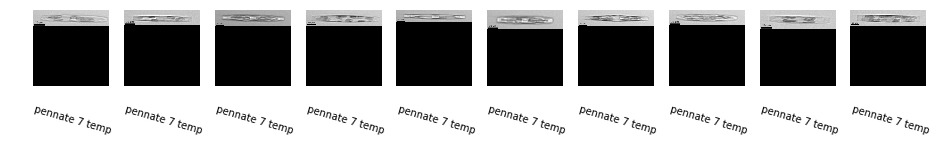

(10, 150, 150)


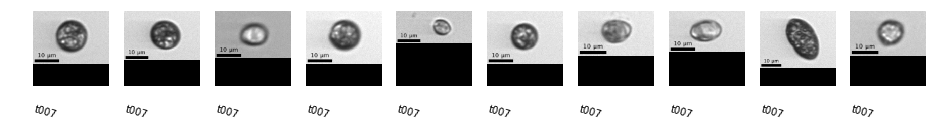

(10, 150, 150)


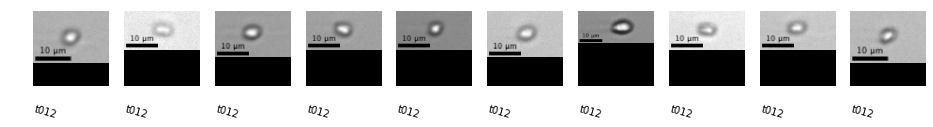

(10, 150, 150)


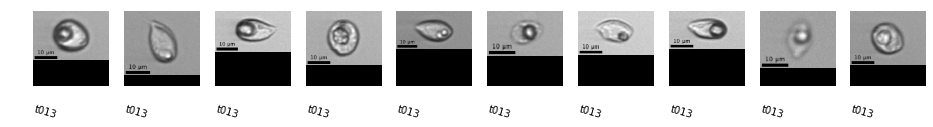

(10, 150, 150)


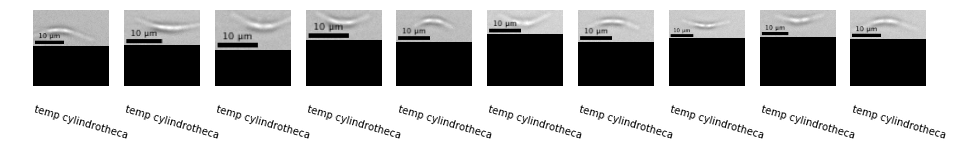

In [50]:
for i in range(np.max(labels)+1):
    imgs_display = images[labels == i][:10,:,:,0]
    print(imgs_display.shape)
    #mlabs = merged_labels[labels == i][:10]
    olabs = original_labels[labels == i][:10]
    fig, ax = plt.subplots(1, 10, figsize=(16, 3))
    for j in range(0, 10):
        try:
            ax[j].imshow(imgs_display[j], cmap = 'gray')
            ax[j].axis('off')
            #ax[j].text(0,-10, mlabs[j], rotation=16)
            ax[j].text(0,200, olabs[j],rotation=-16)
        except IndexError:
            continue
    plt.show()

In [51]:
images.shape, labels.shape, flu_data.shape, object_ids_training.shape

((19684, 150, 150, 1), (19684,), (19684, 233), (19684,))

In [52]:
# # for Random Forest
# images = images[~np.any(np.isnan(flu_data), axis=1)]
# original_labels = original_labels[~np.any(np.isnan(flu_data), axis=1)]

# labels = labels[~np.any(np.isnan(flu_data), axis=1)]
# object_ids_training = object_ids_training[~np.any(np.isnan(flu_data), axis=1)]
# flu_data = flu_data[~np.any(np.isnan(flu_data), axis=1)]

In [53]:
np.count_nonzero(np.isnan(flu_data), axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
# don't need to run this anymore since we removed all the nan data
# flu_data[np.isnan(flu_data)] = 0

In [55]:
images.shape, labels.shape, flu_data.shape, object_ids_training.shape

((19684, 150, 150, 1), (19684,), (19684, 233), (19684,))

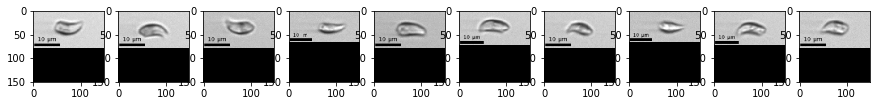

In [56]:
fig, ax = plt.subplots(1,10, figsize=(15,10))
j = 0
for i in range(10,20):
    ax[j].imshow(images[original_labels == 'Cryptophyta'][i,:,:,0], cmap = 'gray')
    j+=1

In [57]:
from tensorflow import keras

from sklearn.model_selection import train_test_split

num_classes = len(class_id_dict)

test_size = 0.20

X_train, X_test, flu_train, flu_test, ids_train, ids_test, y_train, y_test = train_test_split(images, flu_data, object_ids_training, labels, test_size=test_size, random_state=42, stratify=labels)
#flu_train, flu_test, ids_train, ids_test, y_train, y_test = train_test_split(flu_data, object_ids_training, labels, test_size=test_size, random_state=42, stratify=labels)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train.shape, flu_train.shape, X_test.shape

((15747, 150, 150, 1), (15747, 233), (3937, 150, 150, 1))

### Oversample the X_train classes where y_train label N with slight augmentation.

In [58]:
sys.getsizeof(X_train) / 1e9

0.354307644

In [59]:
sys.getsizeof(X_test) / 1e9

0.088582644

In [60]:
X_train.dtype

dtype('uint8')

In [61]:
np.unique(labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([ 490,  295,  739,  405,  116, 1193,  443,  429,  167,  141,  263,
         166,  454,  256,  353,  834, 1010,  243, 1045,  887,  346,  142,
         595,  859,  444,  562,  531,  896,  353,  724,  270,  457,  534,
         571,  591,  579,  234,  358,  340,  369]))

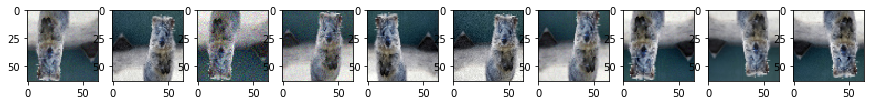

In [62]:
import imgaug as ia
import imgaug.augmenters as iaa


ia.seed(1)

# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
images_example = np.array(
    [ia.quokka(size=(64, 64)) for _ in range(32)],
    dtype=np.uint8
)

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Flipud(0.5),
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(
        0.1,
        iaa.GaussianBlur(sigma=(0, 0.2))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.LinearContrast((0.9, 1.1)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    #iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    #iaa.Affine(
    #    scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
    #    translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
    #    rotate=(-25, 25),
    #    shear=(-8, 8)
    #)
], random_order=True) # apply augmenters in random order

images_aug = seq(images=images_example)
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i])


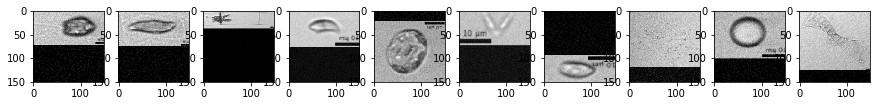

In [63]:
images_aug = seq(images=X_train[:20])
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i,:,:,0], cmap = 'gray')

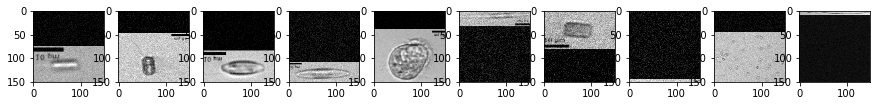

In [64]:
images_aug = seq(images=X_train[1000:1020])
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i,:,:,0], cmap = 'gray')

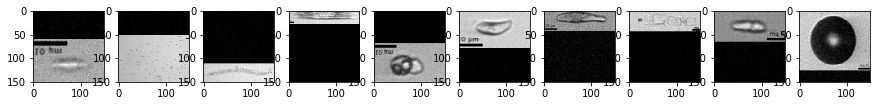

In [65]:
images_aug = seq(images=X_train[5000:5020])
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i,:,:,0], cmap = 'gray')

In [66]:
import random

y_train_argmax = np.argmax(y_train, axis=1)

#train_count = int((1-test_size) * max_count)
max_count = 1000
train_count = max_count

# take the image and augment it and add it to a stack and add the label to another stack and the concat them to the main stacks
class_labels, count_of_classes = np.unique(y_train_argmax, return_counts=True)
list_of_all_images = []
list_of_all_flu_data = []
list_of_all_labs = []
for l, c in enumerate(count_of_classes):
    #print(l)
    list_of_class_images = []
    list_of_class_labs = []
    list_of_class_flu_data = []
    if c < train_count:
        num_to_aug = train_count - c
        all_im_of_class = X_train[y_train_argmax == l]
        all_flu_of_class = flu_train[y_train_argmax == l]
        for i in range(0,num_to_aug):
            im_idx = random.randint(0, all_im_of_class.shape[0]-1)
            im = all_im_of_class[im_idx,:,:,:]
            flu = all_flu_of_class[im_idx,:]
            im = seq(image=im)
            # augmenting the flu data but not sure this is ideal
            flu = flu*random.uniform(0.8, 1.2)
            list_of_class_images.append(im)
            list_of_class_labs.append(l)
            list_of_class_flu_data.append(flu)
    list_of_all_images = list_of_all_images + list_of_class_images
    list_of_all_labs = list_of_all_labs + list_of_class_labs
    list_of_all_flu_data = list_of_all_flu_data + list_of_class_flu_data

In [67]:
list_of_all_labs = np.array(list_of_all_labs)
one_hot = np.zeros((list_of_all_labs.size, list_of_all_labs.max()+1))
one_hot[np.arange(list_of_all_labs.size),list_of_all_labs] = 1
y_train.shape, one_hot.shape

((15747, 40), (24253, 40))

In [68]:
# add these new images into the training data
X_train = np.concatenate((X_train, np.array(list_of_all_images)), axis=0)
y_train = np.concatenate((y_train, one_hot))

In [69]:
list_of_all_flu_data = np.array(list_of_all_flu_data)
flu_train = np.concatenate((flu_train, list_of_all_flu_data), axis=0)

In [70]:
X_train.shape, flu_train.shape, y_train.shape

((40000, 150, 150, 1), (40000, 233), (40000, 40))

In [71]:
sys.getsizeof(X_train) / 1e9

0.900000144

### Must normalize the data or training results are erratic!

In [72]:
np.mean(X_train), np.std(X_train), np.mean(X_test), np.std(X_test)

(69.09171666666667, 69.83248596287274, 66.90001481105185, 71.87663910548324)

In [73]:
np.max(X_test)

255

In [74]:
#np.mean(flu_train[:,0]), np.std(flu_train[:,0])

In [75]:
# replace nan values with mean values from each column

In [76]:
# #Obtain mean of columns as you need, nanmean is convenient.
# col_mean = np.nanmean(flu_train, axis=0)

# #Find indices that you need to replace
# inds = np.where(np.isnan(flu_train))

# #Place column means in the indices. Align the arrays using take
# flu_train[inds] = np.take(col_mean, inds[1])

In [77]:
# scale the train and test flu data
# TODO need to save this fit scaler out to reuse
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(flu_train)
flu_train = scaler.transform(flu_train)
flu_test = scaler.transform(flu_test)

In [78]:
import joblib
joblib.dump(scaler, 'scaler_240_feats_230221_1.gz')
#my_scaler = joblib.load('scaler_240_feats.gz')

['scaler_240_feats_230221_1.gz']

In [79]:
feat_ind = 0
np.min(flu_train[:,feat_ind]), np.max(flu_train[:,feat_ind]), \
    np.mean(flu_train[:,feat_ind]), np.std(flu_train[:,feat_ind])

(-0.45269486, 23.515621, -6.1035155e-09, 1.0000044)

In [80]:
np.min(flu_test[:,feat_ind]), np.max(flu_test[:,feat_ind]), \
    np.mean(flu_test[:,feat_ind]), np.std(flu_test[:,feat_ind])

(-0.45019284, 22.113688, -0.09767706, 0.7697161)

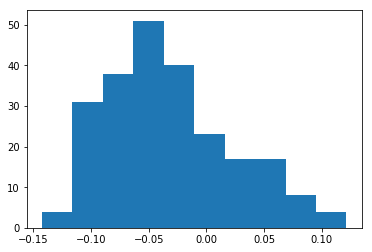

In [81]:
plt.hist(np.mean(flu_test, axis=0))
plt.show()

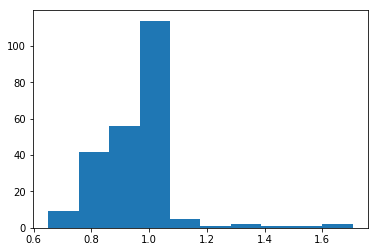

In [82]:
plt.hist(np.std(flu_test, axis=0))
plt.show()

In [83]:
# #X_train = (X_train - 69) / 71
# X_train = X_train/255
# X_train.dtype

In [84]:
# sys.getsizeof(X_train) / 1e9

In [85]:
# X_train = X_train.astype(np.float32)

In [86]:
# sys.getsizeof(X_train) / 1e9

In [87]:
# # X_test = (X_test - 69) / 71
# X_test = X_test/255
# sys.getsizeof(X_test) / 1e9

In [88]:
# X_test = X_test.astype(np.float32)
# sys.getsizeof(X_test) / 1e9

In [89]:
# np.max(X_test)

In [90]:
# np.mean((X_train-70) / 71), np.std((X_train-70) / 71), np.max((X_train-70) / 71), np.min((X_train-70) / 71)

In [91]:
X_train = X_train / 255
X_test = X_test / 255
np.mean(X_train), np.std(X_train), np.mean(X_test), np.std(X_test)

(0.27094790849673034,
 0.2738528861289286,
 0.262352999259028,
 0.2818691729626702)

In [92]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0., 1.]), array([1560000,   40000])),
 (array([0., 1.], dtype=float32), array([153543,   3937])))

#### shuffle input data

In [93]:
from sklearn.utils import shuffle
X_train, flu_train, y_train = shuffle(X_train, flu_train, y_train)

Train RF Model

In [96]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# clf = RandomForestClassifier()
# clf.fit(flu_train, y_train)

In [94]:
input_shape = X_train.shape[1:]
flu_input_shape = flu_train.shape[1:]
batch_size = 40

epochs = 50

input_shape, flu_input_shape

((150, 150, 1), (233,))

In [95]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, Concatenate, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras

### Fine-tuned DenseNet Model

In [66]:
base_model = keras.applications.DenseNet121(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [67]:
# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))
#x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be normalized
# from (0, 255) to a range (-1., +1.), the normalization layer
# does the following, outputs = (inputs - mean) / sqrt(var)
#norm_layer = keras.layers.experimental.preprocessing.Normalization()
#mean = np.array([127.5] * 3)
#var = mean ** 2
# Scale inputs to [-1, +1]
#x = norm_layer(x)
#norm_layer.set_weights([mean, var])

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
x = keras.layers.Dense(256)(x)
outputs = keras.layers.Dense(len(class_id_dict))(x)
model = keras.Model(inputs, outputs)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
densenet121 (Model)          (None, 4, 4, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_5 (Dense)              (None, 44)                11308     
Total params: 7,311,212
Trainable params: 273,708
Non-trainable params: 7,037,504
____________________________________________________________

In [68]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy'],
)

epochs = 100
#model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

checkpoint = ModelCheckpoint('../model_weights_all_classes_100221_densenet_interpolated_256.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(x=[np.stack((X_train,)*3, axis=3)[:,:,:,:,0]], y=y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=([np.stack((X_test,)*3, axis=3)[:,:,:,:,0]], y_test),
                    callbacks=callbacks_list)

MemoryError: 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


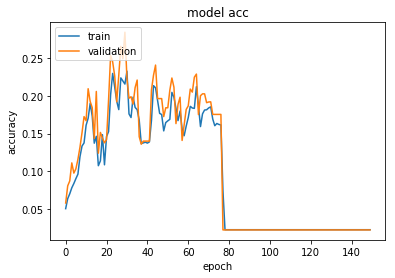

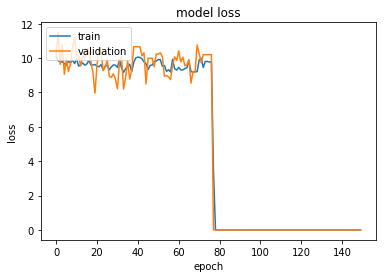

In [71]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#experiment.log_figure(figure=plt, figure_name="model_acc")
plt.savefig("../densenet_modelacc.png", dpi=300)
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#experiment.log_figure(figure=plt, figure_name="model_loss")
plt.savefig("../densenet_modelloss.png", dpi=300)
plt.show()

In [58]:
model = keras.models.load_model('../model_weights_all_classes_100221_densenet_interpolated.hdf5')

In [63]:
base_model.layers

In [59]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy'],
)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
densenet121 (Model)          (None, 4, 4, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 44)                45100     
Total params: 7,082,604
Trainable params: 6,998,956
Non-trainable params: 83,648
_________________________________________________________________


In [61]:
epochs = 100

checkpoint = ModelCheckpoint('../model_weights_all_classes_100221_densenet_interpolated_full.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(x=[np.stack((X_train,)*3, axis=3)[:,:,:,:,0]], y=y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=([np.stack((X_test,)*3, axis=3)[:,:,:,:,0]], y_test),
                    callbacks=callbacks_list)

Train on 31236 samples, validate on 4427 samples
Epoch 1/100
31200/31236 [============================>.] - ETA: 0s - loss: 9.1257 - acc: 0.0367
Epoch 00001: val_acc improved from -inf to 0.02778, saving model to ../model_weights_all_classes_100221_densenet_interpolated_full.hdf5
31236/31236 [==============================] - 228s 7ms/step - loss: 9.1255 - acc: 0.0367 - val_loss: 10.0124 - val_acc: 0.0278
Epoch 2/100
31200/31236 [============================>.] - ETA: 0s - loss: 9.2878 - acc: 0.0271
Epoch 00002: val_acc improved from 0.02778 to 0.03343, saving model to ../model_weights_all_classes_100221_densenet_interpolated_full.hdf5
31236/31236 [==============================] - 179s 6ms/step - loss: 9.2863 - acc: 0.0271 - val_loss: 10.2599 - val_acc: 0.0334
Epoch 3/100
31200/31236 [============================>.] - ETA: 0s - loss: 9.3145 - acc: 0.0290
Epoch 00003: val_acc did not improve from 0.03343
31236/31236 [==============================] - 178s 6ms/step - loss: 9.3161 - acc:

KeyboardInterrupt: 

### Medium Complexity Model

In [96]:
inputs = Input(shape=input_shape)
input_flu = Input(shape=flu_input_shape)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# switch to functional and concat the other features here before the dense layer

x = Flatten()(x)
x = Concatenate(axis=-1)([x, input_flu])
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model([inputs,input_flu], output)
#model = Model([inputs], output)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 1)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 150, 150, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 148, 148, 32) 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 74, 74, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout (D

In [97]:
from sklearn.utils import class_weight

weights_for_unaug = class_weight.compute_class_weight('balanced', np.unique(np.argmax(y_train, axis=1)), np.argmax(y_train, axis=1))
weights_for_unaug

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [98]:
checkpoint = ModelCheckpoint('../model_weights_240_flu_230221_size_cut_1.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

epochs=50

# Fit the model on the batches generated by datagen.flow().
model.compile(loss=keras.losses.categorical_crossentropy,
          optimizer=keras.optimizers.Adadelta(),
          metrics=['accuracy'])

history = model.fit(x=[X_train, flu_train], y=y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=([X_test,flu_test], y_test),
                    callbacks=callbacks_list,
                    class_weight=weights_for_unaug)

# history = model.fit(x=[X_train], y=y_train, 
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1,
#                     validation_data=([X_test], y_test),
#                     callbacks=callbacks_list)

Train on 40000 samples, validate on 3937 samples
Epoch 1/50
39960/40000 [============================>.] - ETA: 0s - loss: 0.8931 - acc: 0.7302
Epoch 00001: val_acc improved from -inf to 0.87859, saving model to ../model_weights_240_flu_230221_size_cut_1.hdf5
40000/40000 [==============================] - 49s 1ms/step - loss: 0.8927 - acc: 0.7303 - val_loss: 0.4148 - val_acc: 0.8786
Epoch 2/50
39920/40000 [============================>.] - ETA: 0s - loss: 0.4493 - acc: 0.8605
Epoch 00002: val_acc improved from 0.87859 to 0.89840, saving model to ../model_weights_240_flu_230221_size_cut_1.hdf5
40000/40000 [==============================] - 46s 1ms/step - loss: 0.4490 - acc: 0.8605 - val_loss: 0.3584 - val_acc: 0.8984
Epoch 3/50
39960/40000 [============================>.] - ETA: 0s - loss: 0.3484 - acc: 0.8915
Epoch 00003: val_acc improved from 0.89840 to 0.91135, saving model to ../model_weights_240_flu_230221_size_cut_1.hdf5
40000/40000 [==============================] - 46s 1ms/step 

KeyboardInterrupt: 

In [99]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#experiment.log_figure(figure=plt, figure_name="model_acc")
plt.savefig("../modelacc.png", dpi=300)
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#experiment.log_figure(figure=plt, figure_name="model_loss")
plt.savefig("../modelloss.png", dpi=300)
plt.show()

NameError: name 'history' is not defined

In [111]:
custom_weights = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2, 1., 1., 1., 1,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [112]:
inputs = Input(shape=input_shape)
input_flu = Input(shape=flu_input_shape)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# switch to functional and concat the other features here before the dense layer

x = Flatten()(x)
x = Concatenate(axis=-1)([x, input_flu])
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model([inputs,input_flu], output)
#model = Model([inputs], output)

model.summary()

checkpoint = ModelCheckpoint('../scaler_240_feats_150221_dayend_final_weighted.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

epochs=100

# Fit the model on the batches generated by datagen.flow().
model.compile(loss=keras.losses.categorical_crossentropy,
          optimizer=keras.optimizers.Adadelta(),
          metrics=['accuracy'])

history = model.fit(x=[X_train, flu_train], y=y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=([X_test,flu_test], y_test),
                    callbacks=callbacks_list,
                    class_weight=custom_weights)

# history = model.fit(x=[X_train], y=y_train, 
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1,
#                     validation_data=([X_test], y_test),
#                     callbacks=callbacks_list)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 150, 150, 1)  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 150, 150, 32) 320         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 148, 148, 32) 9248        conv2d_8[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 74, 74, 32)   0           conv2d_9[0][0]                   
__________________________________________________________________________________________________
dropout_6 

Epoch 9/100
43960/44000 [============================>.] - ETA: 0s - loss: 0.2156 - acc: 0.9344
Epoch 00009: val_acc did not improve from 0.91964
44000/44000 [==============================] - 47s 1ms/step - loss: 0.2156 - acc: 0.9344 - val_loss: 0.3604 - val_acc: 0.9185
Epoch 10/100
43960/44000 [============================>.] - ETA: 0s - loss: 0.2071 - acc: 0.9384
Epoch 00010: val_acc improved from 0.91964 to 0.92097, saving model to ../scaler_240_feats_150221_dayend_final_weighted.hdf5
44000/44000 [==============================] - 47s 1ms/step - loss: 0.2071 - acc: 0.9384 - val_loss: 0.3609 - val_acc: 0.9210
Epoch 11/100
43960/44000 [============================>.] - ETA: 0s - loss: 0.1939 - acc: 0.9413
Epoch 00011: val_acc did not improve from 0.92097
44000/44000 [==============================] - 47s 1ms/step - loss: 0.1939 - acc: 0.9413 - val_loss: 0.3595 - val_acc: 0.9205
Epoch 12/100
43960/44000 [============================>.] - ETA: 0s - loss: 0.1893 - acc: 0.9437
Epoch 0001

Epoch 38/100
43960/44000 [============================>.] - ETA: 0s - loss: 0.1358 - acc: 0.9646
Epoch 00038: val_acc did not improve from 0.92982
44000/44000 [==============================] - 47s 1ms/step - loss: 0.1358 - acc: 0.9646 - val_loss: 0.4761 - val_acc: 0.9196
Epoch 39/100
43960/44000 [============================>.] - ETA: 0s - loss: 0.1338 - acc: 0.9644
Epoch 00039: val_acc did not improve from 0.92982
44000/44000 [==============================] - 47s 1ms/step - loss: 0.1337 - acc: 0.9644 - val_loss: 0.4766 - val_acc: 0.9265
Epoch 40/100
43960/44000 [============================>.] - ETA: 0s - loss: 0.1375 - acc: 0.9637
Epoch 00040: val_acc did not improve from 0.92982
44000/44000 [==============================] - 47s 1ms/step - loss: 0.1376 - acc: 0.9637 - val_loss: 0.4660 - val_acc: 0.9223
Epoch 41/100
43920/44000 [============================>.] - ETA: 0s - loss: 0.1346 - acc: 0.9658
Epoch 00041: val_acc did not improve from 0.92982
44000/44000 [=====================

43960/44000 [============================>.] - ETA: 0s - loss: 0.1280 - acc: 0.9703
Epoch 00068: val_acc did not improve from 0.92982
44000/44000 [==============================] - 47s 1ms/step - loss: 0.1280 - acc: 0.9703 - val_loss: 0.5488 - val_acc: 0.9261
Epoch 69/100
43960/44000 [============================>.] - ETA: 0s - loss: 0.1329 - acc: 0.9691
Epoch 00069: val_acc improved from 0.92982 to 0.93181, saving model to ../scaler_240_feats_150221_dayend_final_weighted.hdf5
44000/44000 [==============================] - 47s 1ms/step - loss: 0.1329 - acc: 0.9691 - val_loss: 0.5349 - val_acc: 0.9318
Epoch 70/100
43960/44000 [============================>.] - ETA: 0s - loss: 0.1231 - acc: 0.9713
Epoch 00070: val_acc did not improve from 0.93181
44000/44000 [==============================] - 47s 1ms/step - loss: 0.1234 - acc: 0.9713 - val_loss: 0.5471 - val_acc: 0.9263
Epoch 71/100
43960/44000 [============================>.] - ETA: 0s - loss: 0.1325 - acc: 0.9691
Epoch 00071: val_acc d

Epoch 98/100
43960/44000 [============================>.] - ETA: 0s - loss: 0.1357 - acc: 0.9717
Epoch 00098: val_acc did not improve from 0.93181
44000/44000 [==============================] - 47s 1ms/step - loss: 0.1356 - acc: 0.9718 - val_loss: 0.5602 - val_acc: 0.9261
Epoch 99/100
43960/44000 [============================>.] - ETA: 0s - loss: 0.1366 - acc: 0.9697
Epoch 00099: val_acc did not improve from 0.93181
44000/44000 [==============================] - 47s 1ms/step - loss: 0.1365 - acc: 0.9698 - val_loss: 0.5814 - val_acc: 0.9267
Epoch 100/100
43960/44000 [============================>.] - ETA: 0s - loss: 0.1282 - acc: 0.9728
Epoch 00100: val_acc did not improve from 0.93181
44000/44000 [==============================] - 47s 1ms/step - loss: 0.1281 - acc: 0.9728 - val_loss: 0.6024 - val_acc: 0.9250


dict_keys(['val_acc', 'acc', 'loss', 'val_loss'])


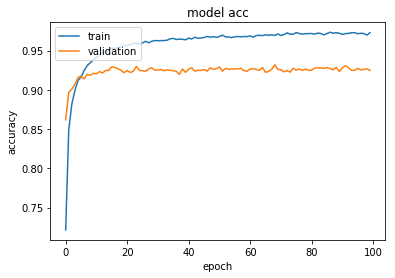

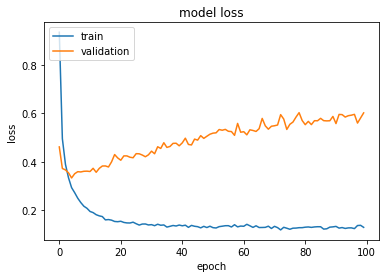

In [113]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#experiment.log_figure(figure=plt, figure_name="model_acc")
plt.savefig("../modelacc.png", dpi=300)
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#experiment.log_figure(figure=plt, figure_name="model_loss")
plt.savefig("../modelloss.png", dpi=300)
plt.show()

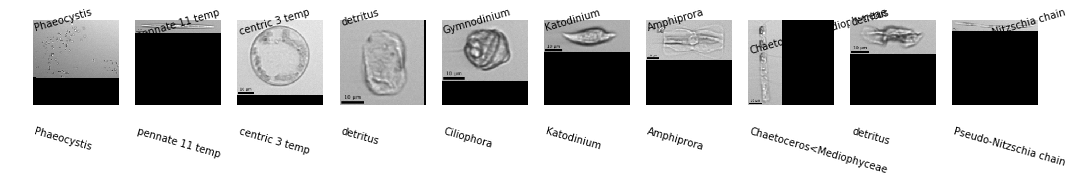

In [100]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
predictions = np.argmax(model.predict([X_test[indices], flu_test[indices]]), axis=1)
#predictions = np.argmax(model.predict([X_test[indices]]), axis=1)
labs = np.argmax(y_test[indices], axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i]], rotation=16)
    
    ax[i].text(0,200, id_class_dict[predictions[i]],rotation=-16)
plt.show()

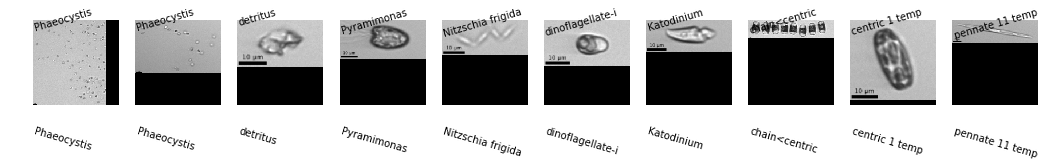

In [101]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
predictions = np.argmax(model.predict([X_test[indices], flu_test[indices]]), axis=1)
#predictions = np.argmax(model.predict([X_test[indices]]), axis=1)
labs = np.argmax(y_test[indices], axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i]], rotation=16)
    
    ax[i].text(0,200, id_class_dict[predictions[i]],rotation=-16)
plt.show()

In [102]:
predictions = np.argmax(model.predict([X_test, flu_test]), axis=1)
#predictions = np.argmax(model.predict([X_test]), axis=1)
labs = np.argmax(y_test, axis=1)

In [135]:
class_id_dict = {'Amphiprora': 0,
 'Chaetoceros single': 1,
 'Chaetoceros<Mediophyceae': 2,
 'Ciliophora': 3,
 'Corethron': 4,
 'Cryptophyta': 5,
 'Cylindrotheca': 6,
 'Dactyliosolen': 7,
 'Dictyochales': 8,
 'Eucampia': 9,
 'Gymnodinium': 10,
 'Gyrodinium': 11,
 'Katodinium': 12,
 'Membraneis': 13,
 'Navicula': 14,
 'Nitzschia frigida': 15,
 'Phaeocystis': 16,
 'Proboscia sp.': 17,
 'Pseudo-Nitzschia chain': 18,
 'Pyramimonas': 19,
 'bubble': 20,
 'centric': 21,
 'centric 1 temp': 22,
 'centric 2 temp': 23,
 'centric 3 temp': 24,
 'chain<centric': 25,
 'chain<pennate': 26,
 'detritus': 27,
 'dinoflagellate-i': 28,
 'dinoflagellate-ii': 29,
 'dinoflagellate-iii': 30,
 'pennate 1 temp': 31,
 'pennate 10 temp': 32,
 'pennate 11 temp': 33,
 'pennate 2 temp': 34,
 'pennate 7 temp': 35,
 't007': 36,
 't012': 37,
 't013': 38,
 'temp cylindrotheca': 39}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())
list(id_class_dict)

[id_class_dict[i] for i in range(len(id_class_dict))]

['Amphiprora',
 'Chaetoceros single',
 'Chaetoceros<Mediophyceae',
 'Ciliophora',
 'Corethron',
 'Cryptophyta',
 'Cylindrotheca',
 'Dactyliosolen',
 'Dictyochales',
 'Eucampia',
 'Gymnodinium',
 'Gyrodinium',
 'Katodinium',
 'Membraneis',
 'Navicula',
 'Nitzschia frigida',
 'Phaeocystis',
 'Proboscia sp.',
 'Pseudo-Nitzschia chain',
 'Pyramimonas',
 'bubble',
 'centric',
 'centric 1 temp',
 'centric 2 temp',
 'centric 3 temp',
 'chain<centric',
 'chain<pennate',
 'detritus',
 'dinoflagellate-i',
 'dinoflagellate-ii',
 'dinoflagellate-iii',
 'pennate 1 temp',
 'pennate 10 temp',
 'pennate 11 temp',
 'pennate 2 temp',
 'pennate 7 temp',
 't007',
 't012',
 't013',
 'temp cylindrotheca']

In [136]:
from sklearn.metrics import confusion_matrix
import itertools

Y_val_pred = predictions
Y_val_real = labs
cm = confusion_matrix(Y_val_real, Y_val_pred)
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(35,35)) 

plt.imshow(cm, cmap = 'Greens')
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, [id_class_dict[i] for i in range(len(id_class_dict))], rotation=90)
plt.yticks(tick_marks, [id_class_dict[i] for i in range(len(id_class_dict))])

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

#plt.savefig("full_model_conf_matrix.png", dpi=300)
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

ValueError: Found input variables with inconsistent numbers of samples: [3937, 74]

In [137]:
# TODO gauge model confidence by the predicted class

In [138]:
from tensorflow import keras

model = keras.models.load_model('../model_weights_240_flu_230221_size_cut_1.hdf5')

In [139]:
val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

object_annotation_category
Amphiprora                   490
Chaetoceros single           295
Chaetoceros<Mediophyceae     739
Ciliophora                   405
Corethron                    116
Cryptophyta                 1193
Cylindrotheca                443
Dactyliosolen                429
Dictyochales                 167
Eucampia                     141
Gymnodinium                  263
Gyrodinium                   166
Katodinium                   454
Membraneis                   256
Navicula                     353
Nitzschia frigida            834
Phaeocystis                 1010
Proboscia sp.                243
Pseudo-Nitzschia chain      1045
Pyramimonas                  887
bubble                       346
centric                      142
centric 1 temp               595
centric 2 temp               859
centric 3 temp               444
chain<centric                562
chain<pennate                531
detritus                     896
dinoflagellate-i             353
dinoflagellate-i

In [140]:
# go through each initial class and find out accuracy of how often that is in the correct merged class

In [141]:
class_id_dict

{'Amphiprora': 0,
 'Chaetoceros single': 1,
 'Chaetoceros<Mediophyceae': 2,
 'Ciliophora': 3,
 'Corethron': 4,
 'Cryptophyta': 5,
 'Cylindrotheca': 6,
 'Dactyliosolen': 7,
 'Dictyochales': 8,
 'Eucampia': 9,
 'Gymnodinium': 10,
 'Gyrodinium': 11,
 'Katodinium': 12,
 'Membraneis': 13,
 'Navicula': 14,
 'Nitzschia frigida': 15,
 'Phaeocystis': 16,
 'Proboscia sp.': 17,
 'Pseudo-Nitzschia chain': 18,
 'Pyramimonas': 19,
 'bubble': 20,
 'centric': 21,
 'centric 1 temp': 22,
 'centric 2 temp': 23,
 'centric 3 temp': 24,
 'chain<centric': 25,
 'chain<pennate': 26,
 'detritus': 27,
 'dinoflagellate-i': 28,
 'dinoflagellate-ii': 29,
 'dinoflagellate-iii': 30,
 'pennate 1 temp': 31,
 'pennate 10 temp': 32,
 'pennate 11 temp': 33,
 'pennate 2 temp': 34,
 'pennate 7 temp': 35,
 't007': 36,
 't012': 37,
 't013': 38,
 'temp cylindrotheca': 39}

### running these on proper val data and not including train

In [142]:
len(val_img_subset)

19684

In [143]:
val_img_subset = val_img_subset.reset_index()

In [144]:
val_img_subset = val_img_subset.set_index('object_id')
#img_md_subset.update(new_val.set_index('object_id')[['object_annotation_status', 'object_annotation_category']])
# this is effectively an upsert operation like in SQL
val_img_subset_only_test = val_img_subset[val_img_subset.index.isin(ids_test)]
val_img_subset_only_test = val_img_subset_only_test.reset_index()
val_img_subset = val_img_subset.reset_index()

In [145]:
#val_img_subset_only_test = val_img_subset

In [146]:
len(val_img_subset_only_test)

3937

In [147]:
val_img_subset_only_test.groupby('object_annotation_category')['object_id'].nunique()

object_annotation_category
Amphiprora                   98
Chaetoceros single           59
Chaetoceros<Mediophyceae    148
Ciliophora                   81
Corethron                    23
Cryptophyta                 239
Cylindrotheca                89
Dactyliosolen                86
Dictyochales                 33
Eucampia                     28
Gymnodinium                  53
Gyrodinium                   33
Katodinium                   91
Membraneis                   51
Navicula                     71
Nitzschia frigida           167
Phaeocystis                 202
Proboscia sp.                48
Pseudo-Nitzschia chain      209
Pyramimonas                 177
bubble                       69
centric                      28
centric 1 temp              119
centric 2 temp              172
centric 3 temp               89
chain<centric               112
chain<pennate               106
detritus                    179
dinoflagellate-i             71
dinoflagellate-ii           145
dinoflagellat

In [148]:
#val_img_subset_only_test = pd.read_csv('../../../Data/fresh_data_012121/ecotaxa_export_live_validated_schuyler_010221.csv')

In [149]:
from tensorflow.keras.preprocessing import image
import numpy as np

names = []
accs = []
counts = []
all_labs = []
all_preds = []

for name, group in val_img_subset_only_test.groupby('object_annotation_category')['object_id']:
    print('*** ',name)    
    images = []
    labels = []
    flus = []

    for fn in group:

        # TODO need to think about optimal size and that size actually corresponds to class
        # maybe add blackspace instead of interpolating because it is changing the morphology

#         img = image.load_img('../../../Data/all_imagery/'+fn+'.png', target_size=(150, 150), color_mode="grayscale")
#         images.append(image.img_to_array(img))
        
#         instead of interpolating increasing to max dimension and then padding
#         see https://stackoverflow.com/questions/47697622/cnn-image-resizing-vs-padding-keeping-aspect-ratio-or-not/49882055#49882055
#         based on https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/
        desired_size = 150
        im = cv2.imread('../../../Data/all_imagery/'+fn+'.png', cv2.IMREAD_GRAYSCALE)
        old_size = im.shape[:2] # old_size is in (height, width) format
        ratio = float(desired_size)/max(old_size)
        new_size = tuple([int(x*ratio) for x in old_size])
        # new_size should be in (width, height) format
        im = cv2.resize(im, (new_size[1], new_size[0]))
        delta_w = desired_size - new_size[1]
        delta_h = desired_size - new_size[0]
        top, bottom = delta_h//2, delta_h-(delta_h//2)
        left, right = delta_w//2, delta_w-(delta_w//2)
        new_im = cv2.copyMakeBorder(im, 0, delta_h, 0, delta_w, cv2.BORDER_CONSTANT,0)
        #img = np.stack((new_im,)*3, axis=3-1)
        img = new_im[..., np.newaxis]
        images.append(img)
    
        mc = val_img_subset[val_img_subset.object_id == fn].object_annotation_category
#         pmt = val_img_subset[val_img_subset.object_id == fn].object_pmt_fluorescence
#         peak = val_img_subset[val_img_subset.object_id == fn].object_peak_fluorescence
        labels.append(class_id_dict[mc.values[0]])
        #flus.append([pmt.values[0], peak.values[0]]) 
        flus.append(np.array(val_img_subset[val_img_subset.object_id == fn].iloc[0][~val_img_subset.columns.isin(cols_not_for_training)].values, dtype=np.float32))
        
    images = np.array(images)
    labels = np.array(labels)
    flus = np.array(flus)
    print(flus.shape)
    #flus[np.isnan(flus)] = 0
    flus = scaler.transform(flus)
    X_predict = images / 255
    #print('normed mean and std: ', np.mean(X_predict), np.std(X_predict))
    
    
    predictions = np.argmax(model.predict([X_predict, flus]), axis=1)
    #predictions = np.argmax(model.predict([X_predict]), axis=1)
    #print(np.count_nonzero(labels==predictions), len(labels))
    #print('accuracy:', np.count_nonzero(labels==predictions)/len(labels))
    names.append(name)
    accs.append(np.count_nonzero(labels==predictions)/len(labels))
    counts.append(len(labels))
    all_labs += list(labels)
    all_preds += list(predictions)
    #print('------')
    
    


***  Amphiprora
(98, 233)
***  Chaetoceros single
(59, 233)
***  Chaetoceros<Mediophyceae
(148, 233)
***  Ciliophora
(81, 233)
***  Corethron
(23, 233)
***  Cryptophyta
(239, 233)
***  Cylindrotheca
(89, 233)
***  Dactyliosolen
(86, 233)
***  Dictyochales
(33, 233)
***  Eucampia
(28, 233)
***  Gymnodinium
(53, 233)
***  Gyrodinium
(33, 233)
***  Katodinium
(91, 233)
***  Membraneis
(51, 233)
***  Navicula
(71, 233)
***  Nitzschia frigida
(167, 233)
***  Phaeocystis
(202, 233)
***  Proboscia sp.
(48, 233)
***  Pseudo-Nitzschia chain
(209, 233)
***  Pyramimonas
(177, 233)
***  bubble
(69, 233)
***  centric
(28, 233)
***  centric 1 temp
(119, 233)
***  centric 2 temp
(172, 233)
***  centric 3 temp
(89, 233)
***  chain<centric
(112, 233)
***  chain<pennate
(106, 233)
***  detritus
(179, 233)
***  dinoflagellate-i
(71, 233)
***  dinoflagellate-ii
(145, 233)
***  dinoflagellate-iii
(54, 233)
***  pennate 1 temp
(91, 233)
***  pennate 10 temp
(107, 233)
***  pennate 11 temp
(114, 233)
***  pe

In [150]:
### for RF Model

In [151]:
#val_img_subset_only_test = val_img_subset_only_test.drop(val_img_subset_only_test[val_img_subset_only_test.object_annotation_category.isin(['Unknowns'])].index)

In [152]:
# flu_data = []
# labels = []
# for index, row in val_img_subset_only_test.iterrows():
#     flu_data.append(np.array(row[~val_img_subset_only_test.columns.isin(cols_not_for_training)].values, dtype=np.float32))
#     labels.append(class_id_dict[row['object_annotation_category']])

In [153]:
#val_img_subset_only_test

In [154]:
# flu_data = np.array(flu_data)
# labels = np.array(labels)

# labels = labels[~np.any(np.isnan(flu_data), axis=1)]
# flu_data = flu_data[~np.any(np.isnan(flu_data), axis=1)]

In [155]:
# all_labs = clf.predict(np.array(flu_data))
# all_preds = np.array(labels)

In [156]:
classes, counts = np.unique(all_preds, return_counts=True)
true_classes, true_counts = np.unique(all_labs, return_counts=True)

In [157]:
classes, counts = np.unique(all_preds, return_counts=True)
print(len(counts))

40


In [158]:
! pwd

/host/Code/deep_ifcb/python


In [159]:
classes, counts = np.unique(all_preds, return_counts=True)
true_classes, true_counts = np.unique(all_labs, return_counts=True)

filled_counts = []
prev_class = -1
i = 0
while len(filled_counts) < len(id_class_dict):
    if i >= len(classes):
        filled_counts.append(0)
        prev_class += 1
    elif classes[i] != 1+prev_class:
        filled_counts.append(0)
        prev_class += 1
    else:
        filled_counts.append(counts[i])
        i += 1
        prev_class += 1
    
filled_true_counts = []
prev_class = -1
i = 0
while len(filled_true_counts) < len(id_class_dict):
    if i >= len(true_classes):
        filled_true_counts.append(0)
        prev_class += 1
    elif true_classes[i] != 1+prev_class:
        filled_true_counts.append(0)
        prev_class += 1
    else:
        filled_true_counts.append(true_counts[i])
        i += 1
        prev_class += 1

In [160]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(np.array(all_labs), np.array(all_preds), average='weighted', labels=list(id_class_dict.keys()))

(0.934265202373899, 0.9316738633477267, 0.9320528353443644, None)

In [161]:
from sklearn.metrics import precision_recall_fscore_support

"""
returns:

precision float (if average is not None) or array of float, shape = [n_unique_labels]
recall float (if average is not None) or array of float, , shape = [n_unique_labels]
fbeta_score float (if average is not None) or array of float, shape = [n_unique_labels]
support None (if average is not None) or array of int, shape = [n_unique_labels]
    The number of occurrences of each label in y_true.
"""

precision, recall, fscore, supports = precision_recall_fscore_support(np.array(all_labs), np.array(all_preds), 
                                average=None, labels=list(id_class_dict.keys()))

In [162]:
len(list(id_class_dict.keys()))

40

In [163]:
len(precision)

40

In [164]:
names = [id_class_dict[x] for x in list(id_class_dict.keys())]

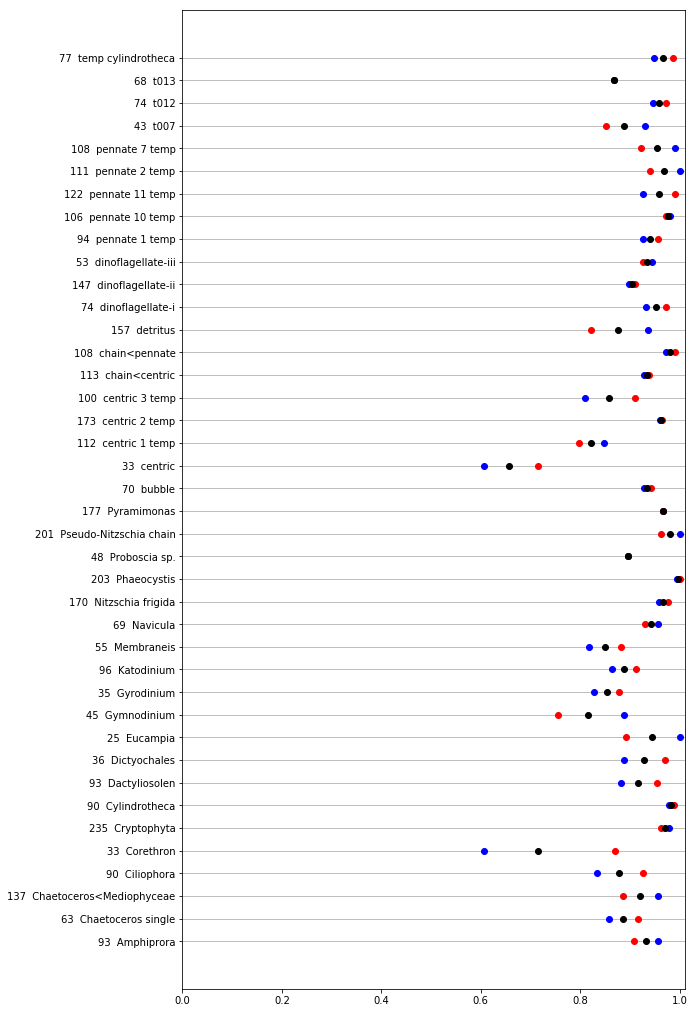

In [165]:
nc = [str(n) + '  ' + m for m,n in zip(names,counts)]

fig, ax = plt.subplots(figsize=(9, 18))
ax.scatter(precision, names, color='blue')
ax.scatter(recall, names, color='red')
ax.scatter(fscore, names, color='black')
ax.set_yticks(range(0,len(names)))
ax.set_yticklabels(nc)
ax.set_xlim(0,1.01)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('../individual_class_acc_densenet_model.png', dpi=300)
plt.show()

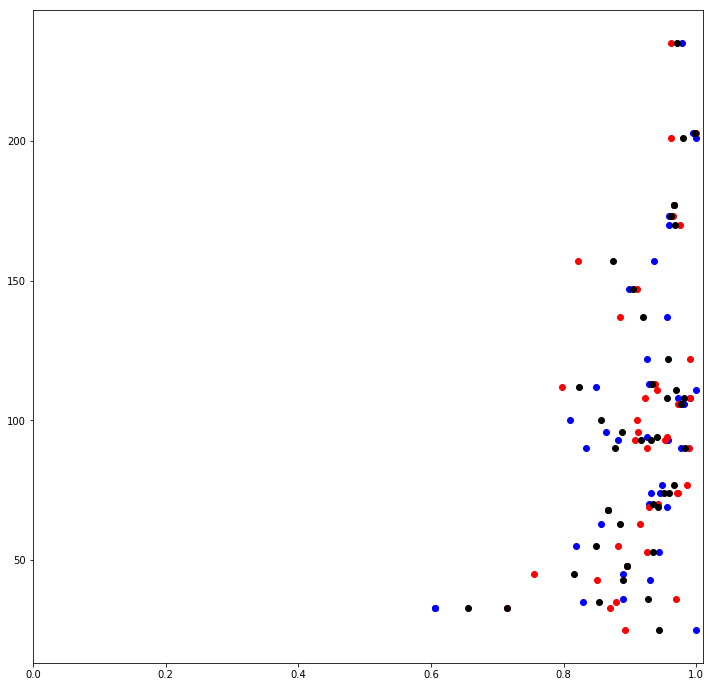

In [166]:
nc = [str(n) + '  ' + m for m,n in zip(names,counts)]

fig, ax = plt.subplots(figsize=(12, 12))
#ax.scatter(accs, counts)
ax.scatter(precision, counts, color='blue')
ax.scatter(recall, counts, color='red')
ax.scatter(fscore, counts, color='black')
#ax.set_yticks(range(0,len(names)))
#ax.set_yticklabels(nc)
ax.set_xlim(0,1.01)
#ax.set_xscale('log')
#ax.set_ylim(-10,1500)

# Don't allow the axis to be on top of your data
#ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('count_vs_acc.png', dpi=300)
plt.show()

In [167]:
! pwd

/host/Code/deep_ifcb/python


Text(0.5, 331.09999999999985, 'Predicted label')

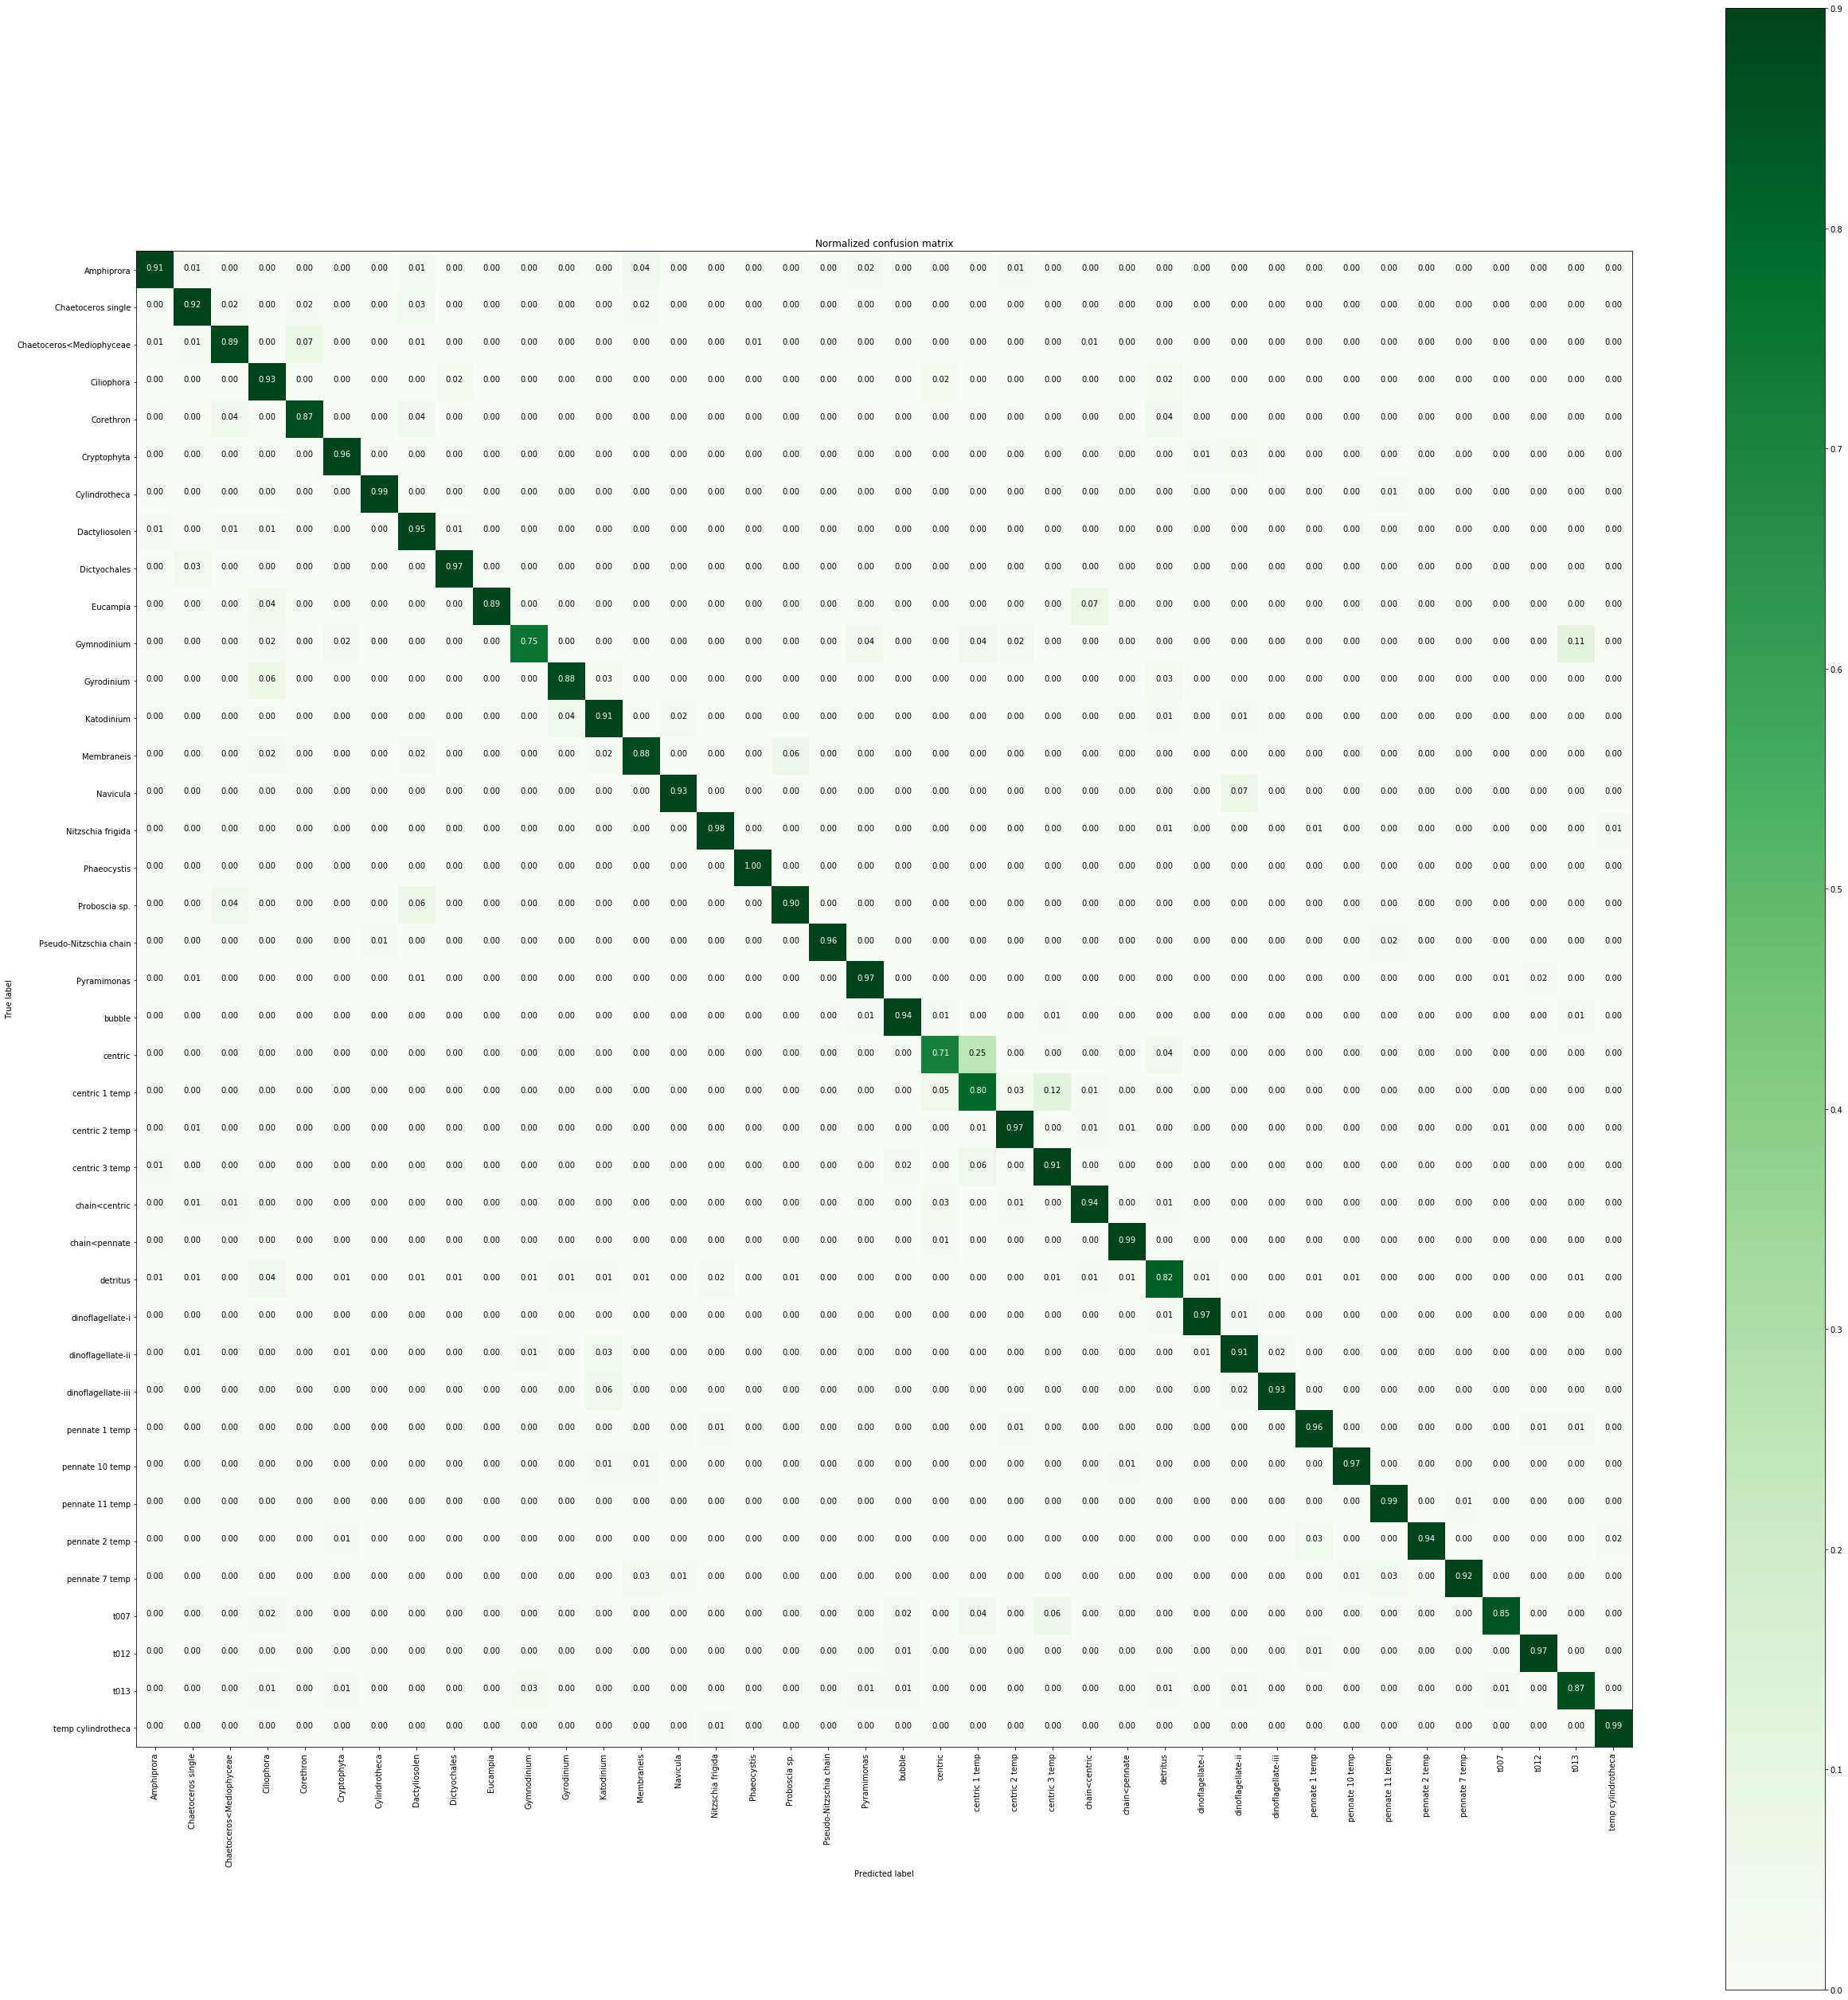

In [168]:
from sklearn.metrics import confusion_matrix
import itertools

num_classes = len(class_id_dict)

cm = confusion_matrix(np.array(all_labs), np.array(all_preds))
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(35,35)) 

plt.imshow(cm, cmap = 'Greens', vmax=0.9)
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, [id_class_dict[i] for i in range(len(id_class_dict))], rotation=90)
plt.yticks(tick_marks, [id_class_dict[i] for i in range(len(id_class_dict))])

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

#plt.savefig('conf_matrix_unmerged_visible_low_end_large.png', dpi=300)

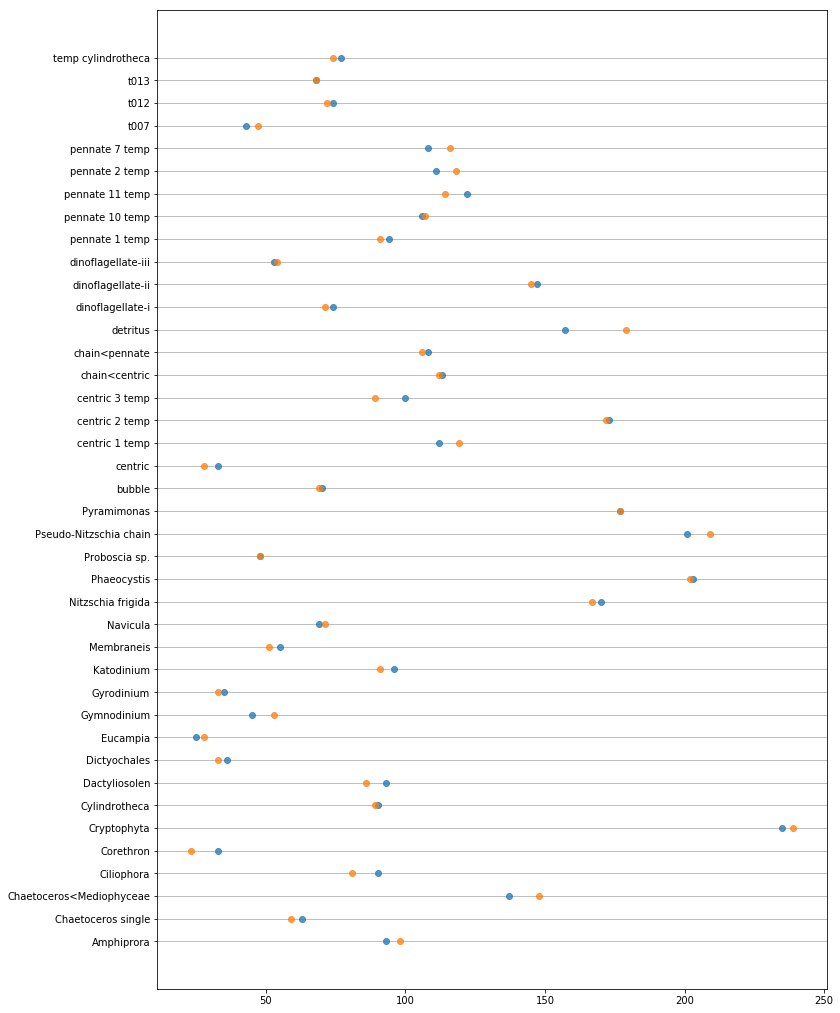

In [169]:
fig, ax = plt.subplots(figsize=(12, 18))
ax.scatter(filled_counts, range(0,len(id_class_dict)), alpha=0.75)
ax.scatter(filled_true_counts, range(0,len(id_class_dict)), alpha=0.75)
ax.set_yticks(range(0,len(id_class_dict)))
ax.set_yticklabels([id_class_dict[i] for i in range(len(id_class_dict))])
#ax.set_xlim(0,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Convert the labels to the merged labels

Find the merged class name corresponding to the individual class name it was classified into

In [137]:
lab

NameError: name 'lab' is not defined

In [138]:
id_class_dict[0]

'Amphiprora'

In [142]:
merged_labs_truth = []
for lab in all_labs:
    for i in range(len(classes)):
        if id_class_dict[lab] in classes[i]: 
            merged_labs_truth.append(class_names[i])

In [143]:
merged_labs = []
for lab in all_preds:
    for i in range(len(classes)):
        if id_class_dict[lab] in classes[i]: 
            merged_labs.append(class_names[i])


In [144]:
len(all_labs), len(merged_labs_truth), len(merged_labs)

(4427, 4427, 4427)

In [145]:
class_id_list = [[x, i] for i, x in enumerate(class_names)]
class_id_dict = {key: value for (key, value) in class_id_list}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

id_class_dict

{0: 'amphiprora',
 1: 'banquisia_belgicae',
 2: 'cylindrotheca',
 3: 'licmophora',
 4: 'nitzschia_frigida',
 5: 'pseudo_nitzschia_chain',
 6: 'unidentified_single_pennate',
 7: 'chaetoceros_mediophyceae',
 8: 'chaetoceros_single',
 9: 'corethron',
 10: 'eucampia_chain',
 11: 'eucampia',
 12: 'dactyliosolen',
 13: 'odontella ',
 14: 'proboscia',
 15: 'rhizosolenia ',
 16: 'unidentified_single_centric',
 17: 'cryptophyta',
 18: 'gyrodinium',
 19: 'gymnodinium',
 20: 'katodinium',
 21: 'warnowia',
 22: 'dinoflagellate_i',
 23: 'dinoflagellate_ii ',
 24: 'dinoflagellate_iii',
 25: 'dinophyceae',
 26: 'pyramimonas ',
 27: 'phaeocystis',
 28: 'dictyochales ',
 29: 'ciliophora ',
 30: 'tintinnida',
 31: 'unidentified_flagellates',
 32: 'unidentified_living_cells',
 33: 'other'}

In [146]:
merged_labs_id = [class_id_dict[x] for x in merged_labs]
len(merged_labs), len(merged_labs_id)

(4427, 4427)

In [147]:
merged_truth_id = [class_id_dict[x] for x in merged_labs_truth]
len(merged_labs_truth), len(merged_truth_id)

(4427, 4427)

In [148]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(np.array(merged_truth_id), np.array(merged_labs_id), average='weighted', labels=list(id_class_dict.keys()))

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.9547537747477857, 0.9541450192003614, 0.9541108955384225, None)

In [149]:
from sklearn.metrics import precision_recall_fscore_support

"""
returns:

precision float (if average is not None) or array of float, shape = [n_unique_labels]
recall float (if average is not None) or array of float, , shape = [n_unique_labels]
fbeta_score float (if average is not None) or array of float, shape = [n_unique_labels]
support None (if average is not None) or array of int, shape = [n_unique_labels]
    The number of occurrences of each label in y_true.
"""

precision, recall, fscore, supports = precision_recall_fscore_support(np.array(merged_truth_id), np.array(merged_labs_id), 
                                average=None, labels=list(id_class_dict.keys()))

In [150]:
names = [id_class_dict[x] for x in list(id_class_dict.keys())]

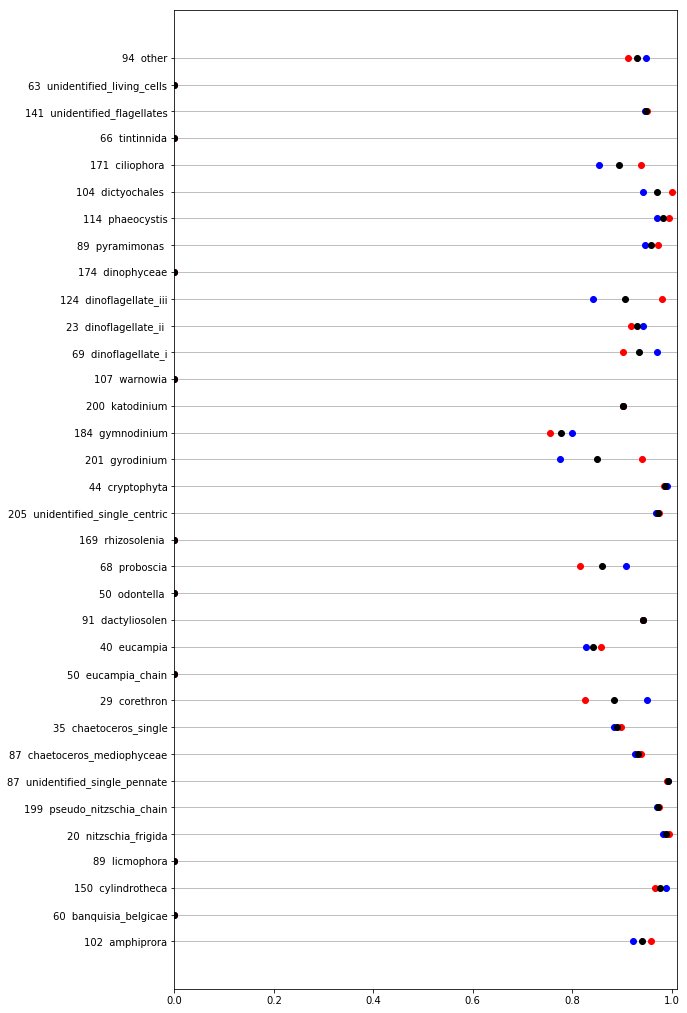

In [151]:
nc = [str(n) + '  ' + m for m,n in zip(names,counts)]

fig, ax = plt.subplots(figsize=(9, 18))
ax.scatter(precision, names, color='blue')
ax.scatter(recall, names, color='red')
ax.scatter(fscore, names, color='black')
ax.set_yticks(range(0,len(names)))
ax.set_yticklabels(nc)
ax.set_xlim(0,1.01)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('merged_class_acc.png', dpi=300)
plt.show()

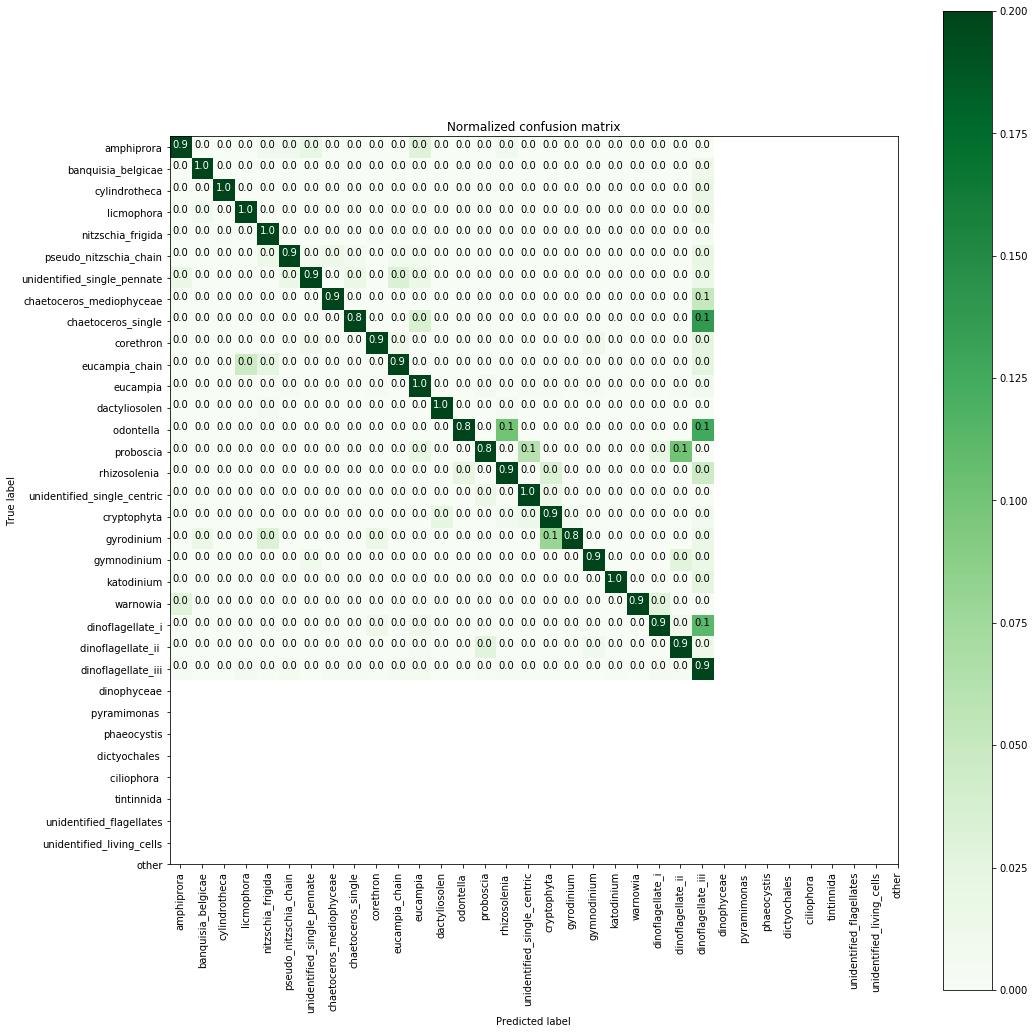

In [152]:
from sklearn.metrics import confusion_matrix
import itertools

num_classes = len(class_id_dict)

cm = confusion_matrix(np.array(merged_labs_id), np.array(merged_truth_id))
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(15,15)) 

plt.imshow(cm, cmap = 'Greens',vmax=0.2)
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, [id_class_dict[i] for i in range(len(id_class_dict))], rotation=90)
plt.yticks(tick_marks, [id_class_dict[i] for i in range(len(id_class_dict))])

fmt = '.1f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

plt.savefig('conf_matrix_medium_merged.png', dpi=300)